In [194]:
from jupyterthemes import jtplot
jtplot.style()

def random_color(n=1):
    import random
    if n == 1:
        return "#{:06x}".format(random.randint(0, 0xFFFFFF))
    lst = []
    for i in range(n):
        lst.append("#{:06x}".format(random.randint(0, 0xFFFFFF)))
    return lst

In [6]:
# Lorsque la barre de menu disparaît
!jt -t onedork -T

In [2]:
vars(list)

dict_proxy({'__add__': <slot wrapper '__add__' of 'list' objects>,
            '__contains__': <slot wrapper '__contains__' of 'list' objects>,
            '__delitem__': <slot wrapper '__delitem__' of 'list' objects>,
            '__delslice__': <slot wrapper '__delslice__' of 'list' objects>,
            '__doc__': "list() -> new empty list\nlist(iterable) -> new list initialized from iterable's items",
            '__eq__': <slot wrapper '__eq__' of 'list' objects>,
            '__ge__': <slot wrapper '__ge__' of 'list' objects>,
            '__getattribute__': <slot wrapper '__getattribute__' of 'list' objects>,
            '__getitem__': <method '__getitem__' of 'list' objects>,
            '__getslice__': <slot wrapper '__getslice__' of 'list' objects>,
            '__gt__': <slot wrapper '__gt__' of 'list' objects>,
            '__hash__': None,
            '__iadd__': <slot wrapper '__iadd__' of 'list' objects>,
            '__imul__': <slot wrapper '__imul__' of 'list' objects

dict_proxy({'__add__': <slot wrapper '__add__' of 'list' objects>,
            '__contains__': <slot wrapper '__contains__' of 'list' objects>,
            '__delitem__': <slot wrapper '__delitem__' of 'list' objects>,
            '__delslice__': <slot wrapper '__delslice__' of 'list' objects>,
            '__doc__': "list() -> new empty list\nlist(iterable) -> new list initialized from iterable's items",
            '__eq__': <slot wrapper '__eq__' of 'list' objects>,
            '__ge__': <slot wrapper '__ge__' of 'list' objects>,
            '__getattribute__': <slot wrapper '__getattribute__' of 'list' objects>,
            '__getitem__': <method '__getitem__' of 'list' objects>,
            '__getslice__': <slot wrapper '__getslice__' of 'list' objects>,
            '__gt__': <slot wrapper '__gt__' of 'list' objects>,
            '__hash__': None,
            '__iadd__': <slot wrapper '__iadd__' of 'list' objects>,
            '__imul__': <slot wrapper '__imul__' of 'list' objects

In [13]:
import pandas as pd
from influxdb import DataFrameClient

def influxdb_query(influxdb_server, query):
    return influxdb_server.query(query)

def query_influx(ini, end):
    merge = pd.DataFrame()
    for ring in range(ini, end+1):
        query = influxdb_query(DataFrameClient("94.247.24.85", "8085", "bytp", "elabelab", "Nice"),\
                               "SELECT max(PM_TBM) AS PM_TBM,\
                               FROM \"drive-1\" WHERE ({clause})"\
                               .format(clause="(time >= '2016-03-24T00:00:00Z' and time <= '2016-03-30T00:00:00Z') group by time(1d)"))['drive-1']
#                                .format(clause="PX_RING_NO = {ring_no}"
#                                        .format(ring_no=ring)))['drive-1']
        merge = pd.concat([merge, query], axis=0)
    return merge

In [26]:
def influxdb_get(fields, dbname="Nice", port="8085", drive="drive-1"):
    client = DataFrameClient("94.247.24.85", port, "bytp", "elabelab", dbname)
    query = "SELECT "
    query += ",".join(map(lambda field: "last(" + str(field) + ") AS " + str(field) + " ", fields))
    query += ", first(RING_NO) as RING_NO "
    query += "FROM \""+str(drive)+"\" WHERE (time >= '2016-03-24T00:00:00Z' and time <= '2017-10-19T00:00:00Z') group by time(1d)"
    print "Waiting from InfluxDB..."
    return client.query(query)[drive]

In [28]:
df = influxdb_get(["PM_TBM"])
df.to_csv("Nice_PM_TBM.csv")

Waiting from InfluxDB...


In [14]:
%timeit df_ring = query_influx(10, 10)

InfluxDBClientError: 400: {"error":"error parsing query: found FROM, expected identifier, string, number, bool at line 1, char 61"}


In [1]:
from influxdb import DataFrameClient

def influxdb_select(dbname,
                    port,
                    drive,
                    fields,
                    selector="mean",
                    where_clause="",
                    time_interval="5s"):
    influxdb_server = DataFrameClient("94.247.24.85", port, "bytp", "elabelab", dbname)
    query = "SELECT {fields}{extrafield} FROM \"{drive}\" {where_clause}".format(
            fields=",".join(map(lambda field: "{selector}({field}) AS {field} ".format(selector=selector, field=field), fields)),\
            extrafield=", first(RING_NO) AS RING_NO ",\
            drive=drive,\
            where_clause="WHERE ({clause}) GROUP BY time({interval})".format(clause=where_clause, interval=time_interval))
    print "Waiting from InfluxDB..."
    result = influxdb_server.query(query)[drive]
    print "Done !"
    return result

df_TMCLK = influxdb_select("TMCLK", "8086", "drive-S881", ["DR_CH_GEN_ANGULAR_POS", "EXC_SL_EXCAV_MODE"], selector="mean", where_clause="time >= '2017-01-15T00:00:00Z' and time <= '2017-02-16T00:00:00Z'", time_interval="1d")
df_TMCLK


Waiting from InfluxDB...
Done !


,DR_CH_GEN_ANGULAR_POS,EXC_SL_EXCAV_MODE,RING_NO
2017-01-15 00:00:00+00:00,171.579652,0.330782,1052.0
2017-01-16 00:00:00+00:00,191.428239,0.422705,1058.0
2017-01-17 00:00:00+00:00,184.346252,0.413459,1067.0
2017-01-18 00:00:00+00:00,168.252994,0.204741,1075.0
2017-01-19 00:00:00+00:00,177.273954,0.402325,1079.0
2017-01-20 00:00:00+00:00,115.298574,0.251632,1087.0
2017-01-21 00:00:00+00:00,231.893057,0.100113,1092.0
2017-01-22 00:00:00+00:00,113.668918,0.121226,1094.0
2017-01-23 00:00:00+00:00,172.862987,0.128669,1097.0
2017-01-24 00:00:00+00:00,119.171099,0.303921,1099.0


In [ ]:
import numpy as np

# https://fr.wikipedia.org/wiki/M%C3%A9thode_de_Monte-Carlo
def pi_by_probability_law(n=5000000):
    x = np.random.uniform(0, 1, n)
    y = np.random.uniform(0, 1, n)
    res = np.bincount(map(lambda x, y: (x**2 + y**2 <= 1), x, y))
    return (float(res[1]) / n) * 4

result = []
for i in range(1):
    result.append(pi_by_probability_law())

np.mean(result)

In [32]:
3.1416077000000002 - np.pi

1.5046410207109062e-05

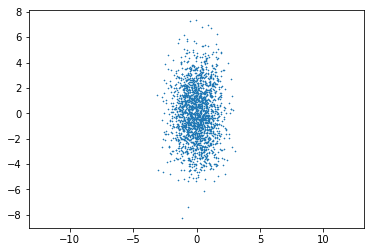

In [8]:
mean = [0, 0]
cov = [[1, 0], [0, 5]]  # diagonal covariance

import numpy as np
import matplotlib.pyplot as plt
x, y = np.random.multivariate_normal(mean, cov, 2000).T
plt.plot(x, y, 'x', ms=1)
plt.axis('equal')
plt.show()

In [10]:
# https://stackoverflow.com/questions/38698277/plot-normal-distribution-in-3d
# https://stackoverflow.com/questions/27230824/fit-multivariate-gaussian-distribution-to-a-given-dataset

%matplotlib qt
# %matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

#Parameters to set
mu_x = 0
variance_x = 3

mu_y = 0
variance_y = 15

#Create grid and multivariate normal
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal([mu_x, mu_y], [[variance_x, 0], [0, variance_y]])

#Make a 3D plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

In [31]:
import numpy as np
from scipy import stats
np.random.seed(12345678)
x = stats.norm.rvs(loc=0, scale=1, size=4000)
stats.shapiro(x)
# (0.9772805571556091, 0.08144091814756393)

(0.99952232837677, 0.4394337236881256)

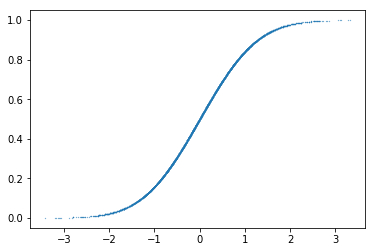

In [32]:
import matplotlib.pyplot as plt

stats.norm.cdf(x, loc=0, scale=1)
plt.plot(x, stats.norm.cdf(x), '.', ms=.5, label='frozen pdf')
plt.show()

In [1]:
# Pour les paramètres d'entrée météo

## https://github.com/remcmurry/Psychropy/blob/master/psychropy.py

import math

def Sat_press(Tdb):

    ''' Function to compute saturation vapor pressure in [kPa]
        ASHRAE Fundamentals handbood (2005) p 6.2, equation 5 and 6
            Tdb = Dry bulb temperature [degC]
            Valid from -100C to 200 C
    '''

    C1 = -5674.5359
    C2 = 6.3925247
    C3 = -0.009677843
    C4 = 0.00000062215701
    C5 = 2.0747825E-09
    C6 = -9.484024E-13
    C7 = 4.1635019
    C8 = -5800.2206
    C9 = 1.3914993
    C10 = -0.048640239
    C11 = 0.000041764768
    C12 = -0.000000014452093
    C13 = 6.5459673
 
    TK = Tdb + 273.15                     # Converts from degC to degK
    
    if TK <= 273.15:
        result = math.exp(C1/TK + C2 + C3*TK + C4*TK**2 + C5*TK**3 + 
                          C6*TK**4 + C7*math.log(TK)) / 1000
    else:
        result = math.exp(C8/TK + C9 + C10*TK + C11*TK**2 + C12*TK**3 + 
                          C13*math.log(TK)) / 1000
    return result


def Hum_rat(Tdb, Twb, P):
    
    ''' Function to calculate humidity ratio [kg H2O/kg air]
        Given dry bulb and wet bulb temp inputs [degC]
        ASHRAE Fundamentals handbood (2005)
            Tdb = Dry bulb temperature [degC]
            Twb = Wet bulb temperature [degC]
            P = Ambient Pressure [kPa]
    '''

    Pws = Sat_press(Twb)
    Ws = 0.62198 * Pws / (P - Pws)          # Equation 23, p6.8
    if Tdb >= 0:                            # Equation 35, p6.9
        result = (((2501 - 2.326*Twb)*Ws - 1.006*(Tdb - Twb))/
                  (2501 + 1.86*Tdb - 4.186*Twb))
    else:                                   # Equation 37, p6.9
        result = (((2830 - 0.24*Twb)*Ws - 1.006*(Tdb - Twb))/
                  (2830 + 1.86*Tdb - 2.1*Twb))
    return result


def Hum_rat2(Tdb, RH, P):

    ''' Function to calculate humidity ratio [kg H2O/kg air]
        Given dry bulb and wet bulb temperature inputs [degC]
        ASHRAE Fundamentals handbood (2005)
            Tdb = Dry bulb temperature [degC]
            RH = Relative Humidity [Fraction or %]
            P = Ambient Pressure [kPa]
    '''
    Pws = Sat_press(Tdb)
    result = 0.62198*RH*Pws/(P - RH*Pws)    # Equation 22, 24, p6.8
    return result


def Wet_bulb(Tdb, RH, P):
    
    ''' Calculates the Wet Bulb temp given:        
            Tdb = Dry bulb temperature [degC]
            RH = Relative humidity ratio [Fraction or %]
            P = Ambient Pressure [kPa]
        Uses Newton-Rhapson iteration to converge quickly
    '''

    W_normal = Hum_rat2(Tdb, RH, P)
    result = Tdb
    
    ' Solves to within 0.001% accuracy using Newton-Rhapson'    
    W_new = Hum_rat(Tdb, result, P)
    while abs((W_new - W_normal) / W_normal) > 0.00001:
        W_new2 = Hum_rat(Tdb, result - 0.001, P)
        dw_dtwb = (W_new - W_new2) / 0.001
        result = result - (W_new - W_normal) / dw_dtwb
        W_new = Hum_rat(Tdb, result, P)
    return result

print Wet_bulb(12, .60, 101.325)
#8.21832830215
print Wet_bulb(27, .58, 100.000)
#20.8548016644

8.21832830215
20.8548016644


In [12]:
print Wet_bulb(12, .60, 101.325)
print Wet_bulb(27, .58, 100.000)


8.21832830215
20.8548016644


In [7]:
# Wet_bulb(12, .60, 101.31)
Wet_bulb(70, .60, 84.000)

59.19654815420056

In [4]:
import numpy as np

def to_cartesian(rthetaphi):
    r = rthetaphi[0]
    theta = rthetaphi[1] * np.pi / 180 # to radian
    phi = rthetaphi[2] * np.pi / 180
    x = r * np.sin( theta ) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return [x, y, z]

def dist_3d(pt1, pt2):
    return np.sqrt((pt2[0]-pt1[0])**2+(pt2[1]-pt1[1])**2+(pt2[2]-pt1[2])**2)

# def asSpherical(xyz):
#     x = xyz[0]
#     y = xyz[1]
#     z = xyz[2]
#     r = np.sqrt(x*x + y*y + z*z)
#     theta = np.acos(z/r) * 180 / np.pi #to degrees
#     phi = np.atan2(y, x) * 180 / np.pi
#     return [r, theta, phi]

In [45]:
origin = [0, 0, 0]

A1 = to_cartesian([52.9785, 33.58536/100*90, 94.03215/100*90])
print A1

# A2 = to_cartesian([52.9784, (233.58371-200)/100*90, (-305.96396)/100*90])
A2 = to_cartesian([52.9785, (33.58448)/100*90, (94.03407)/100*90])
print A2

dist_3d(A1, A2)


[2.4965227810190473, 26.55357450363255, 45.77550127889249]
[2.495662732326965, 26.55301980367874, 45.77586994347479]


0.001087791048753787

In [2]:
## https://code.i-harness.com/fr/q/3ed0b2

from sympy import *
def to_cartesian(rthetaphi):
    r = rthetaphi[0]
    theta = rthetaphi[1] * pi / 200 # to radian
    phi = rthetaphi[2] * pi / 200
    x = r * sin( theta ) * cos(phi)
    y = r * sin(theta) * sin(phi)
    z = r * cos(theta)
    return [x, y, z]

def dist_3d(pt1, pt2):
    return sqrt((pt2[0]-pt1[0])**2+(pt2[1]-pt1[1])**2+(pt2[2]-pt1[2])**2)

D1 = symbols('D1')
D2 = symbols('D2')
Hz1 = symbols('Hz1')
Hz2 = symbols('Hz2')
V1 = symbols('V1')
V2 = symbols('V2')

dist_3d(to_cartesian([D1, Hz1, V1]),\
        to_cartesian([D2, Hz2, V2]))

# D1 = symbols('E7')
# D2 = symbols('AC7')
# Hz1 = symbols('C7')
# Hz2 = symbols('K7')
# V1 = symbols('D7')
# V2 = symbols('U7')

# sqrt((AC7*cos(pi*K7/200) - E7*cos(pi*C7/200))**2 +\
# (AC7*sin(pi*K7/200)*sin(pi*U7/200) - E7*sin(pi*C7/200)*sin(pi*D7/200))**2 +\
# (AC7*sin(pi*K7/200)*cos(pi*U7/200) - E7*sin(pi*C7/200)*cos(pi*D7/200))**2)


NameError: name 'symbols' is not defined

In [8]:
def to_cartesian(rthetaphi):
    r = rthetaphi[0]
    theta = rthetaphi[1]
    phi = rthetaphi[2]
    x = r * np.sin( theta ) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return [x, y, z]

to_cartesian((52.16331,0.019938162,3.755303455))


[-0.8501940431288117, -0.5989249173841266, 52.15294209523049]

In [23]:
from influxdb import DataFrameClient
import pandas as pd

def read_data():
    client = DataFrameClient(host=u"topoju.tunnel-lab.com", port=80, database="mydb99")
    results = client.query(u'SELECT * FROM "xyz" GROUP BY "targetFriendlyName"')
    res = pd.DataFrame()
    for k, v in results.iteritems():
        target = pd.DataFrame(v).tz_convert('Europe/Paris')
        target["targetFriendlyName"] = k[1][0][1]
        res = pd.concat([res, target], sort=True)
    return res

df = read_data()
df

,cycleUid,nodeFriendlyName,nodeUid,targetFriendlyName,targetUid,x,y,z
2019-01-30 18:59:28.587000+01:00,2e124f47-4479-4156-8c48-45ccdabe166c,TopoNode1,0001054030f2,51fe7f19-886c-490e-a82b-38591ef60zzz,51fe7f19-886c-490e-a82b-38591ef60zzz,644912.543071,6.866239e+06,49.403306
2019-01-30 19:01:27.491000+01:00,af1fb0e8-d917-4cf0-842b-85711eaa7eaf,TopoNode1,0001054030f2,51fe7f19-886c-490e-a82b-38591ef60zzz,51fe7f19-886c-490e-a82b-38591ef60zzz,644912.543415,6.866239e+06,49.403417
2019-01-30 19:03:45.125000+01:00,2a9b8b6b-6d44-42f2-8802-c9dad4f0544d,TopoNode1,0001054030f2,51fe7f19-886c-490e-a82b-38591ef60zzz,51fe7f19-886c-490e-a82b-38591ef60zzz,644912.543592,6.866239e+06,49.403710
2019-01-30 19:07:53.894000+01:00,db9b45f3-40e7-402d-a2fc-d36798ff4448,TopoNode1,0001054030f2,51fe7f19-886c-490e-a82b-38591ef60zzz,51fe7f19-886c-490e-a82b-38591ef60zzz,644912.543422,6.866239e+06,49.403733
2019-01-30 19:09:49.455000+01:00,2ebd7e61-85c9-4cac-a564-5135dc5f68a0,TopoNode1,0001054030f2,51fe7f19-886c-490e-a82b-38591ef60zzz,51fe7f19-886c-490e-a82b-38591ef60zzz,644912.543469,6.866239e+06,49.403488
2019-01-30 19:11:50.554000+01:00,e9621cc9-10d0-4392-9bfc-c4324758b9e8,TopoNode1,0001054030f2,51fe7f19-886c-490e-a82b-38591ef60zzz,51fe7f19-886c-490e-a82b-38591ef60zzz,644912.543509,6.866239e+06,49.403477
2019-01-30 19:14:01.929000+01:00,bcea1260-5d51-49e7-a522-236b05868a35,TopoNode1,0001054030f2,51fe7f19-886c-490e-a82b-38591ef60zzz,51fe7f19-886c-490e-a82b-38591ef60zzz,644912.543268,6.866239e+06,49.403450
2019-01-30 19:16:12.429000+01:00,99bd82b9-ada6-4840-840e-15d3caab4898,TopoNode1,0001054030f2,51fe7f19-886c-490e-a82b-38591ef60zzz,51fe7f19-886c-490e-a82b-38591ef60zzz,644912.543921,6.866239e+06,49.403739
2019-01-30 19:18:06.194000+01:00,2279a6a8-32e7-443c-a67d-6b4239ad907c,TopoNode1,0001054030f2,51fe7f19-886c-490e-a82b-38591ef60zzz,51fe7f19-886c-490e-a82b-38591ef60zzz,644912.543421,6.866239e+06,49.403667
2019-01-30 19:26:06.785000+01:00,781107ee-edb8-4ea7-a3b0-8a91ee4da607,TopoNode1,0001054030f2,51fe7f19-886c-490e-a82b-38591ef60zzz,51fe7f19-886c-490e-a82b-38591ef60zzz,644919.867068,6.866257e+06,49.403574


In [25]:
df[["targetUid", "x", "y", "z"]].sort_index()

,targetUid,x,y,z
2019-01-30 17:32:01.984000+01:00,0001054030f2,644916.205241,6.866248e+06,49.928365
2019-01-30 17:33:36.003000+01:00,0001054030f2,644916.204845,6.866248e+06,49.928043
2019-01-30 17:35:21.256000+01:00,0001054030f2,644916.204770,6.866248e+06,49.928223
2019-01-30 17:36:58.605000+01:00,0001054030f2,644916.204844,6.866248e+06,49.928091
2019-01-30 17:38:28.899000+01:00,0001054030f2,644916.205158,6.866248e+06,49.928433
2019-01-30 17:40:28.081000+01:00,0001054030f2,644916.205147,6.866248e+06,49.928365
2019-01-30 17:44:28.355000+01:00,0001054030f2,644916.205353,6.866248e+06,49.928543
2019-01-30 17:56:23.664000+01:00,0001054030f2,644916.205272,6.866248e+06,49.928494
2019-01-30 18:17:28.452000+01:00,0001054030f2,644916.204846,6.866248e+06,49.927996
2019-01-30 18:19:24.340000+01:00,0001054030f2,644916.205091,6.866248e+06,49.928170


In [2]:
# Longueur d'onde
#785 nm

from __future__ import division
from __future__ import print_function
import logging

__version__ = "1.0"

logger = logging.getLogger("ref_index")
logger.setLevel(logging.DEBUG)
h = logging.StreamHandler()
h.setLevel(logging.DEBUG)
f = logging.Formatter("%(name)s: %(levelname)s - %(message)s")
h.setFormatter(f)
logger.addHandler(h)


def f2k(f):
    """Converts Fahrenheit to Kelvin."""
    return (f - 32.0) * (100.0 / 180.0) + 273.15


def k2f(k):
    """Converts Kelvin to Fahrenheit."""
    return (k - 273.15) * (180.0 / 100.0) + 32.0


def c2k(c):
    """Converts Celsius to Kelvin."""
    return c + 273.15


def k2c(k):
    """Converts Kelvin to Celsius."""
    return k - 273.15


def c2f(c):
    """Converts Celsius to Fahrenheit."""
    return c * (180.0 / 100.0) - 32.0


def f2c(f):
    """Converts Fahrenheit to Celsius."""
    return (f - 32.0) * (100.0 / 180.0)


def svp_water(t):
    """Saturation vapour pressure over water at given temperature.
    Parameters
    ----------
    t : float
        Air temperature in degree Celsius.
    Returns
    -------
    p_sv : float
        Saturation vapour pressure over water, at the given
        temperature, in Pascal.
    Notes
    -----
    From section A-I of
    http://emtoolbox.nist.gov/Wavelength/Documentation.asp.
    """
    import math
    K1 = 1.16705214528e+03
    K2 = -7.24213167032e+05
    K3 = -1.70738469401e+01
    K4 = 1.20208247025e+04
    K5 = -3.23255503223e+06
    K6 = 1.49151086135e+01
    K7 = -4.82326573616e+03
    K8 = 4.05113405421e+05
    K9 = -2.38555575678e-01
    K10 = 6.50175348448e+02

    T = t + 273.15
    omega = T + K9 / (T - K10)
    A = omega ** 2 + K1 * omega + K2
    B = K3 * omega ** 2 + K4 * omega + K5
    C = K6 * omega ** 2 + K7 * omega + K8
    X = -B + math.sqrt(B ** 2 - 4 * A * C)

    p_sv = 1.0e6 * ((2.0 * C / X) ** 4)

    return p_sv


def svp_ice(t):
    """Saturation vapour pressure over ice at given temperature.
    Parameters
    ----------
    t : float
        Temperature in degree Celsius.
    Returns
    -------
    p_sv : float
        Saturation vapour pressure over ice, at the given
        temperature, in Pascal.
    Notes
    -----
    From section A-I of
    http://emtoolbox.nist.gov/Wavelength/Documentation.asp.
    """
    import math
    A1 = -13.928169
    A2 = 34.7078238

    t += 273.15
    theta = t / 273.16
    Y = A1 * (1 - theta ** -1.5) + A2 * (1 - theta ** -1.25)

    p_sv = 611.657 * math.exp(Y)

    return p_sv


def dew_point_wvpp(td):
    """Water vapour saturation pressure, given dew point temperature."""
    return svp_water(td)


def frost_point_wvpp(tf):
    """Water vapour saturation pressure, given frost point temperature."""
    return svp_ice(tf)


def rh2wvpp(rh, t):
    """Convert relative humidity to water vapour partial pressure.
    Parameters
    ----------
    rh : float
        Relative humidity as a number between 0 and 100.
    t : float
        Temperature in degree Celsius.
    Returns
    -------
    p_sv : float
        Water vapour partial pressure, in Pascal.
    Notes
    -----
    See section A-II of
    http://emtoolbox.nist.gov/Wavelength/Documentation.asp.
    """
    # t > 0 according to documentation.
    if t >= 0:
        p_sv = svp_water(t)
    elif t < 0:
        p_sv = svp_ice(t)

    return (rh / 100.0) * p_sv


def f_factor(p, t):
    """Enhancement factor for calculating mole fraction.
    Parameters
    ----------
    p : float
        Pressure in Pascal.
    t : float
        Temperature in degree Celsius.
    Returns
    -------
    f : float
        Enhancement factor needed in calculation of mole fraction.
    Notes
    -----
    See section A-II of
    http://emtoolbox.nist.gov/Wavelength/Documentation.asp.
    """
    alpha = 1.00062
    beta = 3.14e-8
    gamma = 5.60e-7

    return alpha + beta * p + gamma * (t ** 2)


def dew_point_mole_fraction(p, t):
    """Water vapour mole fraction for given dew point temperature.
    Parameters
    ----------
    p : float
        Pressure in Pascal.
    t : float
        Temperature in degree Celsius.
    Returns
    -------
    xv : float
        Mole fraction.
    Notes
    -----
    See section A-II of
    http://emtoolbox.nist.gov/Wavelength/Documentation.asp.
    """
    return f_factor(p, t) * dew_point_wvpp(t) / p


def frost_point_mole_fraction(p, t):
    """Water vapour mole fraction for given frost point temperature.
    Parameters
    ----------
    p : float
        Pressure in Pascal.
    t : float
        Temperature in degree Celsius.
    Returns
    -------
    xv : float
        Mole fraction.
    Notes
    -----
    See section A-II of
    http://emtoolbox.nist.gov/Wavelength/Documentation.asp.
    """
    return f_factor(p, t) * frost_point_wvpp(t) / p


def rh2mole_fraction(rh, p, t):
    """Water vapour mole fraction from relative humidity.
    Parameters
    ----------
    rh : float
        Relative humidity as a number between 0 and 100.
    p : float
        Pressure in Pascal.
    t : float
        Temperature in Kelvin.
    Returns
    -------
    xv : float
        Mole fraction.
    Notes
    -----
    See section A-II of
    http://emtoolbox.nist.gov/Wavelength/Documentation.asp.
    """
    return f_factor(p, t) * rh2wvpp(rh, t) / p


def pp2mole_fraction(pv, p, t):
    """Water vapour mole fraction from partial pressure.
    Parameters
    ----------
    rh : float
        Relative humidity as a number between 0 and 100.
    p : float
        Pressure in Pascal.
    t : float
        Temperature in Kelvin.
    Returns
    -------
    xv : float
        Mole fraction.
    Notes
    -----
    See section A-II of
    http://emtoolbox.nist.gov/Wavelength/Documentation.asp.
    """
    return f_factor(p, t) * pv / p


def _check_range(**kwargs):
    """Return True if value is inside accepted range."""
    if not (350 <= kwargs.get('wave', 633) <= 1600):
        logger.warning("Wave length outside [350nm, 1600nm].")
    if not (60000 <= kwargs.get('p', 101325) <= 120000):
        logger.warning("Pressure outside [60000Pa - 120000Pa].")
    if not (0 <= kwargs.get('t', 20) <= 40):
        logger.warning("Temperature outside [0C - 40C].")
    if not (1 < kwargs.get('rh', 50) <= 85):
        logger.warning("Relative humidity outside (1 - 85].")
    if not (kwargs.get('xv', 0.4) >= 0.2):
        logger.warning("Mole fraction less than 0.2.")
    if kwargs.get('co2', 450) != 450:
        logger.warning("CO2 concentration is not 450.")


def ciddor_ri(wave, t, p, xv, co2=450, warn=False):
    """Refractive index of air according to the Ciddor equation.
    Parameters
    ----------
    wave : float or Numpy array of float
        Wavelength in vacuum, in nano-meters. Valid wavelength range is
        300nm - 1700nm.
    t : float
        Temperature in degree Celsius. Valid temperate range is -40 to
        100 degree Celsius.
    p : float
        Pressure in Pascal. Valid range is from 10kPa - 140 kPa.
    xv : float
        Water vapour mole fraction, as a number between 0 and
        1. Default is set to 0.
    co2 : float
        Carbon dioxide concentration in µmole/mole. The default value
        of 450 should be enough for most purposes. Valid range is from
        0 - 2000 µmole/mole.
    warn : bool
        Warning is issued if parameters fall outside accept
        range. Accepted range is smaller than the valid ranges
        mentioned above. See module docstring for accepted ranges.
        The default is False and no warnings are issued.
    Notes
    -----
    See section A-III of
    http://emtoolbox.nist.gov/Wavelength/Documentation.asp.
    See
    """
    if warn:
        _check_range(wave, t, p, xv)

    w0 = 295.235
    w1 = 2.6422
    w2 = -0.03238
    w3 = 0.004028
    k0 = 238.0185
    k1 = 5792105
    k2 = 57.362
    k3 = 167917
    a0 = 1.58123e-6
    a1 = -2.9331e-8
    a2 = 1.1043e-10
    b0 = 5.707e-6
    b1 = -2.051e-8
    c0 = 1.9898e-4
    c1 = -2.376e-6
    d = 1.83e-11
    e = -0.765e-8
    pr1 = 101325
    tr1 = 288.15
    Za = 0.9995922115
    rhovs = 0.00985938
    R = 8.314472
    Mv = 0.018015

    wave = wave * 1.0e-3
    S = 1.0 / wave ** 2

    ras = 1e-8 * ((k1 / (k0 - S)) + (k3 / (k2 - S)))
    rvs = 1.022e-8 * (w0 + w1 * S + w2 * S ** 2 + w3 * S ** 3)

    Ma = 0.0289635 + 1.2011e-8 * (co2 - 400.0)

    raxs = ras * (1 + 5.34e-7 * (co2 - 450.0))

    T = t + 273.15

    Zm = a0 + a1 * t + a2 * t ** 2 + (b0 + b1 * t) * xv + \
        (c0 + c1 * t) * xv ** 2
    Zm *= -(p / T)
    Zm += (p / T ) ** 2 * (d + e * xv ** 2)
    Zm += 1

    rhoaxs = pr1 * Ma / (Za * R * tr1)

    rhov = xv * p * Mv / (Zm * R * T)

    rhoa = (1 - xv) * p * Ma / (Zm * R * T)

    n = 1.0 + (rhoa / rhoaxs) * raxs + (rhov / rhovs) * rvs

    return n


def ciddor(wave, t, p, rh, co2=450, warn=False):
    """Refractive index of air according to the Ciddor equation.
    Accepts relative humidity instead of mole fraction, as done in
    ``ciddor_ri()``.
    Parameters
    ----------
    wave : float or Numpy array of float
        Wavelength in vacuum, in nano-meters. Valid wavelength range is
        300nm - 1700nm.
    t : float
        Temperature in degree Celsius. Valid temperate range is -40 to
        100 degree Celsius.
    p : float
        Pressure in Pascal. Valid range is from 10kPa - 140 kPa.
    rh : float
        Relative humidity [0 - 100].
    co2 : float
        Carbon dioxide concentration in µmole/mole. The default value
        of 450 should be enough for most purposes. Valid range is from
        0 - 2000 µmole/mole.
    warn : bool
        Warning is issued if parameters fall outside accept
        range. Accepted range is smaller than the valid ranges
        mentioned above. See module docstring for accepted ranges.
        The default is False and no warnings are issued.
    Notes
    -----
    See section A-III of
    http://emtoolbox.nist.gov/Wavelength/Documentation.asp.
    """
    if warn:
        _check_range(wave, t, p, rh)
        # turn off warning, so that ciddor_ri doesn't issue duplicate
        # warning.
        warn = False

    xv = rh2mole_fraction(rh=rh, p=p, t=t)
    return ciddor_ri(wave=wave, t=t, p=p, xv=xv, co2=co2, warn=warn)


def edlen_ri(wave, t, p, pv, warn=False):
    """Refractive index of air according to the Edlén equation.
    Parameters
    ----------
    wave : float or Numpy array of float
        Wavelength in vacuum, in nano-meters. Valid wavelength range is
        300nm - 1700nm.
    t : float
        Temperature in degree Celsius. Valid temperate range is -40 to
        100 degree Celsius.
    p : float
        Pressure in Pascal. Valid range is from 10kPa - 140 kPa.
    pv : float
        Water vapour partial pressure, in Pascal.
    warn : bool
        Warning is issued if parameters fall outside accept
        range. Accepted range is smaller than the valid ranges
        mentioned above. See module docstring for accepted ranges.
        The default is False and no warnings are issued.
    Notes
    -----
    See section A-IV of
    http://emtoolbox.nist.gov/Wavelength/Documentation.asp.
    """
    if warn:
        _check_range(wave, t, p)

    A = 8342.54
    B = 2406147
    C = 15998
    D = 96095.43
    E = 0.601
    F = 0.00972
    G = 0.003661

    wave = wave * 1.0e-3
    S = 1.0 / wave ** 2

    ns = 1 + 1e-8 * (A + B / (130.0 - S) + C / (38.9 - S))

    X = (1 + 1e-8 * (E - F * t) * p) / (1 + G * t)

    ntp = 1 + p * (ns - 1) * X / D

    n = ntp - 1e-10 * ((292.75 / (t + 273.15)) * \
                           (3.7345 - 0.0401 * S)) * pv

    return n


def edlen(wave, t, p, rh, warn=False):
    """Refractive index of air according to the Edlén equation.
    Accepts relative humidity instead of water vapour partial pressure,
    as in ``edlen_ri()``.
    Parameters
    ----------
    wave : float or Numpy array of float
        Wavelength in vacuum, in nano-meters. Valid wavelength range is
        300nm - 1700nm.
    t : float
        Temperature in degree Celsius. Valid temperate range is -40 to
        100 degree Celsius.
    p : float
        Pressure in Pascal. Valid range is from 10kPa - 140 kPa.
    rh : float
        Relative humidity in [0 - 100].
    warn : bool
        Warning is issued if parameters fall outside accept
        range. Accepted range is smaller than the valid ranges
        mentioned above. See module docstring for accepted ranges.
        The default is False and no warnings are issued.
    Notes
    -----
    See section A-IV of
    http://emtoolbox.nist.gov/Wavelength/Documentation.asp.
    """
    if warn:
        _check_range(wave, t, p)
        # turn off warning so that edlen_ri() doesn't raise duplicate
        # warning.
        warn = False

    pv = rh2wvpp(rh=rh, t=t)
    return edlen_ri(wave=wave, t=t, p=p, pv=pv, warn=warn)


def vac2air(wave, t=15.0, p=101325, rh=0.0, co2=450, warn=False):
    """Wavelength of light in air, using Ciddor refractive index.
    Parameters
    ----------
    wave : float or Numpy array of float
        Wavelength in nano-meters. Valid range is 300nm - 1700nm.
    t : float
        Temperature in degree Celsius. Valid range is -40 - 100 degree
        Celsius. Default is 15 degree Celsius (288.15 Kelvin).
    p : float
        Pressure in Pascal. Valid range is 10kPa - 140kPa. Default is
        101325 Pa (1 atmosphere).
    rh : float
        Relative humidity as a number between 0 and 100. Default is 0.
    co2 : float
        Carbon dioxide concentration in µmole/mole. The default value
        of 450 is sufficient for most purposes. Valid range is 0 - 2000
        µmole/mole.
    warn : bool
        Warning is issued if parameters fall outside accept
        range. Accepted range is smaller than the valid ranges
        mentioned above. See module docstring for accepted ranges.
        The default is False and no warnings are issued.
    Returns
    -------
    w : float
        Wavelength in air, in nm.
    """
    if warn:
        _check_range(wave, t, p, rh, co2)

    n = ciddor(wave, t, p, rh, co2)
    return wave / n


def air2vac(wave, t=15.0, p=101325, rh=0.0, co2=450, warn=False):
    """Wavelength of light in vacuum, using Ciddor refractive index.
    The refractive index calculation needs wavelength in vacuum. In
    this function, the wavelength in air is used. The errors are on the
    order of 1e-5 nm.
    Parameters
    ----------
    wave : float or Numpy array of float
        Wavelength in nano-meters. Valid range is 300nm - 1700nm.
    t : float
        Temperature in degree Celsius. Valid range is -40 - 100 degree
        Celsius. Default is 15 degree Celsius (288.15 Kelvin).
    p : float
        Pressure in Pascal. Valid range is 10kPa - 140kPa. Default is
        101325 Pa (1 atmosphere).
    rh : float
        Relative humidity as a number between 0 and 100. Default is 0.
    co2 : float
        Carbon dioxide concentration in µmole/mole. The default value
        of 450 is sufficient for most purposes. Valid range is 0 - 2000
        µmole/mole.
    warn : bool
        Warning is issued if parameters fall outside accept
        range. Accepted range is smaller than the valid ranges
        mentioned above. See module docstring for accepted ranges.
        The default is False and no warnings are issued.
    Returns
    -------
    w : float
        Wavelength in vacuum, in nm.
    """
    if warn:
        _check_range(wave=wave, t=t, p=p, rh=rh, co2=co2)

    n = ciddor(wave, t, p, rh, co2)
    return wave * n


def _test_nist_ciddor_1():
    """Compare with NIST output.
    Values from http://emtoolbox.nist.gov/Wavelength/Ciddor.asp.
    fix t at 20, p at 101325, rh at 50
    """
    wave = [321.456, 500, 600.1234, 633.0, 700, 1000.987, 1500.8, 1700.0]
    nist_n = [1.000283543, 1.000273781, 1.000271818, 1.000271373,
              1.000270657, 1.000269038, 1.00026819, 1.000268041]
    nist_w = [321.364879, 499.863147, 599.96032, 632.828268,
              699.810591, 1000.717769, 1500.397608, 1699.544453]

    xv = rh2mole_fraction(50, 101325, 20)

    n = [ciddor_ri(i, 20, 101325, xv) for i in wave]
    wave_n = [vac2air(i, t=20, p=101325, rh=50.0) for i in wave]

    for i, j in zip(n, nist_n):
        assert abs(i - j) < 1e-8

    for i, j in zip(wave_n, nist_w):
        assert abs(i - j) < 1e-6

    n = [ciddor(i, 20, 101325, 50.0) for i in wave]
    wave_n = [vac2air(i, t=20, p=101325, rh=50.0) for i in wave]

    for i, j in zip(n, nist_n):
        assert abs(i - j) < 1e-8

    for i, j in zip(wave_n, nist_w):
        assert abs(i - j) < 1e-6


def _test_nist_ciddor_2():
    """Compare with NIST output.
    Values from http://emtoolbox.nist.gov/Wavelength/Ciddor.asp.
    fix wave at 633.0 p at 101325 rh at 50
    """
    t = [-20.0, 0.0, 20, 26.7982, 40.123, 60.45]
    nist_w = [632.800737, 632.815441, 632.828268, 632.832303, 632.839872,
              632.850953]
    nist_n = [1.00031489, 1.000291647, 1.000271373, 1.000264994, 1.000253031,
              1.000235516]

    xv = [rh2mole_fraction(50, 101325, i) for i in t]
    n = [ciddor_ri(633.0, i, 101325, j) for i, j in zip(t, xv)]

    wave_n = [vac2air(633.0, i, 101325, 50) for i in t]

    for i, j in zip(n, nist_n):
        assert abs(i - j) < 1e-8

    for i, j in zip(wave_n, nist_w):
        assert abs(i - j) < 1e-6


def _test_nist_ciddor_3():
    """Compare with NIST output.
    Values from http://emtoolbox.nist.gov/Wavelength/Ciddor.asp.
    fix wave at 633.0, t at 20, rh at 50. vary p
    """
    p = [1000 * i for i in [10, 50.123, 100.1234, 140.0]]

    nist_n = [1.000026385, 1.000133999, 1.000268148, 1.000375169]
    nist_w = [632.983299, 632.91519, 632.830308, 632.762607]

    xv = [rh2mole_fraction(50, i, 20) for i in p]
    n = [ciddor_ri(633.0, 20, i, j) for i, j in zip(p, xv)]

    wave_n = [vac2air(633.0, 20, i, 50) for i in p]

    for i, j in zip(n, nist_n):
        assert abs(i - j) < 1e-8

    for i, j in zip(wave_n, nist_w):
        assert abs(i - j) < 1e-6


def _test_nist_ciddor_4():
    """Compare with NIST output.
    Values from http://emtoolbox.nist.gov/Wavelength/Ciddor.asp.
    fix wave at 633.0, t at 20, p at 101325, vary rh.
    """
    rh = [0.0, 20.123, 40, 50.9876, 70, 90.7432, 100.0]
    nist_n = [1.0002718, 1.000271627, 1.000271458, 1.000271364,
              1.000271203, 1.000271027, 1.000270949]
    nist_w = [632.827997, 632.828106, 632.828214, 632.828273,
              632.828375, 632.828486, 632.828535]

    xv = [rh2mole_fraction(i, 101325, 20) for i in rh]
    n = [ciddor_ri(633.0, 20, 101325, j) for j in xv]

    wave_n = [vac2air(633.0, 20, 101325, i) for i in rh]

    for i, j in zip(n, nist_n):
        assert abs(i - j) < 1e-8

    for i, j in zip(wave_n, nist_w):
        assert abs(i - j) < 1e-6


def _test_air2vac():
    """Test reversibility with vac2air."""
    wave = [321.456, 500, 600.1234, 633.0, 700, 1000.987, 1500.8, 1700.0]
    wave_o = [air2vac(vac2air(i)) for i in wave]

    for i, j in zip(wave, wave_o):
        assert abs(i - j) < 1e-5


def _test_idlastro():
    # Using IDLASTRO downloaded on 2011/10/07. The vac2air.pro uses a
    # formulation of the Ciddor equation. Previous versions used a
    # different equation.

    # The REVISION HISTORY from the vac2air.pro file is:
    # ; REVISION HISTORY
    # ;       Written W. Landsman                November 1991
    # ;       Use Ciddor (1996) formula for better accuracy in the infrared
    # ;           Added optional output vector, W Landsman Mar 2011
    # ;       Iterate for better precision W.L./D. Schlegel  Mar 2011

    # The REVISION HISTORY from air2vac.pro file is:
    # ; REVISION HISTORY
    # ;	Written, D. Lindler 1982
    # ;	Documentation W. Landsman  Feb. 1989
    # ;       Use Ciddor (1996) formula for better accuracy in the infrared
    # ;           Added optional output vector, W Landsman Mar 2011

    # Velocity errors in m/s for different wave length errors, at
    # different wave lengths.
    # >>> 1e-5/330.0 * 299792458
    # 9.0846199393939404
    # >>> 1e-5/200.0 * 299792458
    # 14.989622900000001
    # >>> 1e-5/1000.0 * 299792458
    # 2.9979245800000003

    # nm
    wave = [200.0, 300.0, 500.0, 800.0, 1200.0, 1600.0, 1700.0]

    # angstrom
    wave_idl_vactoair = [1999.3526550081103323,
                         2999.1255923046301177,
                         4998.6055889614663101, 7997.8003315140686027,
                         11996.7167708424640296, 15995.6298776736693981,
                         16995.3579139663052047]
    wave_vac2air = [vac2air(i, t=15, rh=0) for i in wave]

    # values in wave_idl_vactoair was fed to airtovac idl procedure.
    wave_idl_airtovac = [1999.3526550081103323,
                        3000.0000371189012185,
                        5000.0000183785432455,
                        8000.0000108292333607,
                        12000.0000070745754783,
                        16000.0000052688483265,
                        17000.0000049538284657]
    # Have to convert angstrom to nm.
    wave_air2vac = [air2vac(i / 10.0, t=15, rh=0)
                    for i in wave_idl_vactoair]

    for i, j in zip(wave_vac2air, wave_idl_vactoair):
        # Convert nm to angstrom.
        assert abs(i - j / 10.0) < 1e-4

    # IDL code ignores values under 2000 angstrom.
    for i, j in zip(wave_air2vac[1:], wave_idl_airtovac[1:]):
        # Convert nm to angstrom.
        assert abs(i - j / 10.0) < 1e-4

    #return wave_idl_vactoair, wave_idl_airtovac

def _run_tests():
    import sys
    m = sys.modules[__name__]
    x = dir(m)
    tests = [getattr(m, i) for i in x if i.startswith("_test")]
    for test in tests:
        print(test.__name__)
        test()

In [18]:
ciddor(wave=785.0, t=5, p=101325, rh=20)
(10**6)*(ciddor(wave=785.0, t=50, p=101325, rh=100) - 1)

241.1986945021205

In [9]:
import circlify as circ

data = [120, 19, 17, 13, 11, 7, 5, 3, 2, 1]
circles = circ.circlify(data, with_enclosure=True)

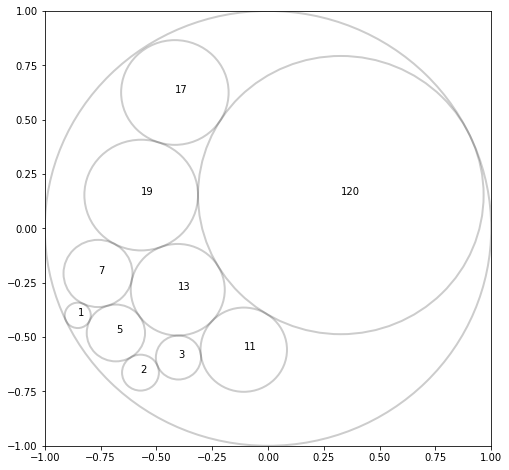

In [10]:
circ.bubbles(circles, data)


In [14]:
from urllib import quote
print quote('/test')
print quote('/test', safe='')
print quote("SELECT * FROM \"rawangle\" WHERE nodeFriendlyName =~ /^TPN02/ AND time > '2019-02-20T08:00:00Z'")


/test
%2Ftest
SELECT%20%2A%20FROM%20%22rawangle%22%20WHERE%20nodeFriendlyName%20%3D%7E%20/%5ETPN02/%20AND%20time%20%3E%20%272019-02-20T08%3A00%3A00Z%27


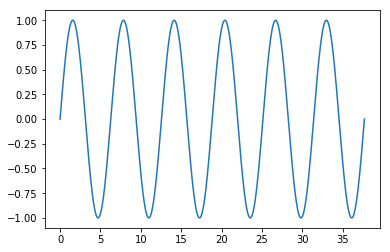

In [67]:
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

x = np.linspace(0, 12 * np.pi, 1000 + 1)
y = np.sin(x)
plt.plot(x, y)
# plt.stem(x,y)
# plt.axis("equal")
plt.show()

In [68]:
print 12 * np.pi
print len(x)
x

37.6991118431
1001


array([ 0.        ,  0.03769911,  0.07539822, ..., 37.62371362,
       37.66141273, 37.69911184])

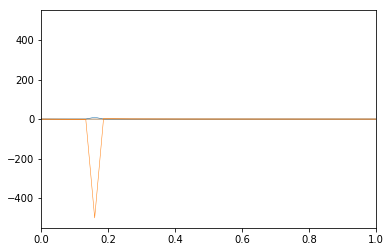

In [70]:
n = len(y)
fourier = np.fft.fft(y, n)
freq = np.fft.fftfreq(n, d=12*np.pi/1000)
plt.plot(freq, fourier.real, label="real", linewidth=0.5)
plt.plot(freq, fourier.imag, label="imag", linewidth=0.5)
plt.xlim(0, 1)
plt.show()

(256L,)


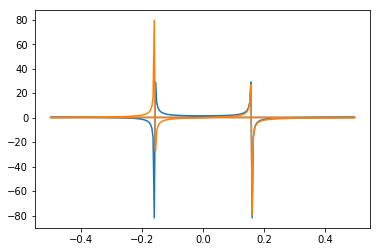

In [72]:
t = np.arange(256)
print t.shape
sp = np.fft.fft(np.sin(t))
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq, sp.real, freq, sp.imag)
plt.show()

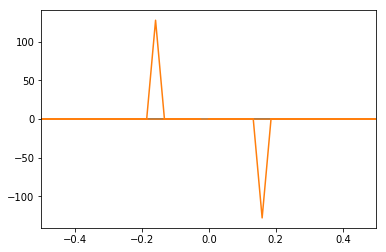

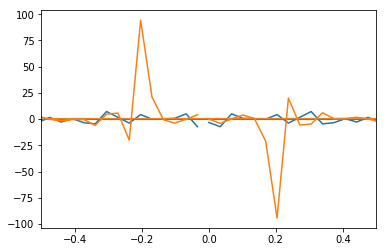

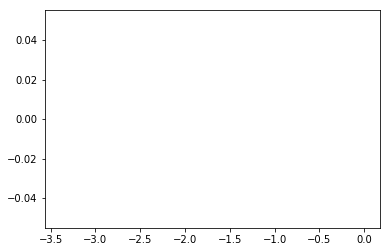

In [160]:
t = np.arange(0, 12*np.pi, 12*np.pi / 256.)
# print t.shape
sp = np.fft.fft(np.sin(t))
freq = np.fft.fftfreq(t.shape[-1], d=12*np.pi / 256.)
plt.plot(freq, sp.real, freq, sp.imag)
plt.xlim(-0.5, 0.5)
plt.show()

## Suppression de quelques enregistrements => altération du signal
t_bis = np.array(sorted(np.random.choice(t, size=200, replace=False)))
sp = np.fft.fft(np.sin(t_bis))
freq = np.fft.fftfreq(t_bis.shape[-1], d=12*np.pi / 256.)
plt.plot(freq, sp.real, freq, sp.imag)
plt.xlim(-0.5, 0.5)
plt.show()

## Trnasformation de quelques enregistrements en nan => ftt vierge
def swap_elements(x, t):
    new_x = x[:]
    for idx, value in zip(np.random.choice(range(len(x)), size=len(t), replace=False), t):
        new_x[idx] = value
    return new_x

t_tierce = swap_elements(t, np.repeat(np.NaN, 4))
sp = np.fft.fft(np.sin(t_tierce))
freq = np.fft.fftfreq(t_tierce.shape[-1], d=12*np.pi / 256.)
plt.plot(freq, sp.real, freq, sp.imag)
# plt.xlim(-0.5, 0.5)
plt.show()


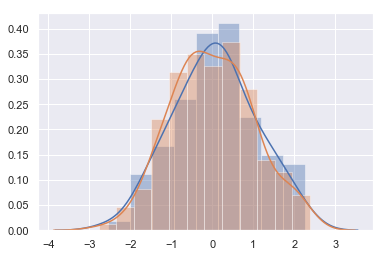

In [184]:
import seaborn as sns, numpy as np
sns.set(); np.random.seed(0)
x1 = np.random.randn(100)
x2 = np.random.randn(200)
ax = sns.distplot(x1)
ax = sns.distplot(x2)

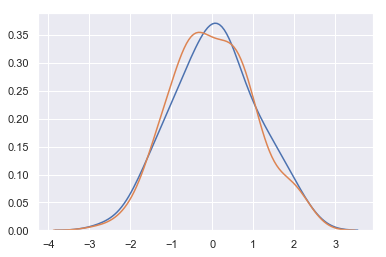

In [186]:
from scipy.stats import norm
ax = sns.distplot(x1, hist=False)
ax = sns.distplot(x2, hist=False)
# plt.savefig("output.png")

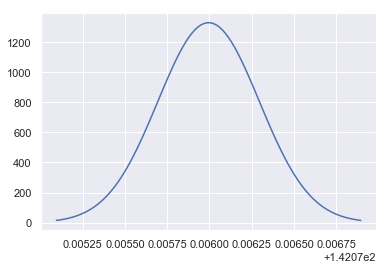

In [201]:

mu = 142.075995
std = 0.0003
x = np.linspace(mu - 3*std, mu + 3*std, 100)
plt.plot(x, norm.pdf(x, mu, std))
plt.show()

In [11]:
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd

X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
X_embedded = TSNE(n_components=2).fit_transform(X)
pd.DataFrame(data=X_embedded)


,0,1
0,-0.000024,0.000153
1,0.000092,-0.000055
2,-0.000073,-0.000049
3,0.000152,-0.000180


,0,1
0,-0.000024,0.000153
1,0.000092,-0.000055
2,-0.000073,-0.000049
3,0.000152,-0.000180


In [2]:
from pyproj import Proj, transform
import numpy as np

Lambert93_Gambetta_x, Lambert93_Gambetta_y = 644862.76, 6866270.66
Lambert93_PorteMaillot_x, Lambert93_PorteMaillot_y = 647272.8804, 6864514.3966
# wgs84 = Proj(init='epsg:4326')
# Lambert93 = Proj(init='epsg:2154')
# wgs84_PorteMaillot_x, wgs84_PorteMaillot_y = transform(Lambert93, wgs84,\
#                                                        Lambert93_PorteMaillot_x, Lambert93_PorteMaillot_y)
# print(wgs84_PorteMaillot_x, wgs84_PorteMaillot_y)
# wgs84_Gambetta_x, wgs84_Gambetta_y = transform(Lambert93, wgs84,\
#                                                        Lambert93_Gambetta_x, Lambert93_Gambetta_y)
# print(wgs84_Gambetta_x, wgs84_Gambetta_y)

def convert2LatLong(inProj, x_inProj, y_inProj):
    inProj = Proj(init='epsg:2154')
    outProj = Proj(init='epsg:4326')
    return transform(inProj, outProj, x_inProj, y_inProj)

convert2LatLong('epsg:4326', Lambert93_Gambetta_x, Lambert93_Gambetta_y)

# a : demi-grand axe de l’ellipsoïde (en m)
# b : demi-petit axe de l’ellipsoïde (en m)
# e : première excentricité de l’ellipsoïde
# n : exposant de la projection
# c : constante de la projection
# λc : longitude origine (rad) par rapport au méridien origine

# λ : longitude (en rad)
# φ : latitude (en rad)
# γ : convergence des méridiens au point (λ, ϕ) (en rad)
# L : latitude isométrique
# N : grande normale
# m : module linéaire au point (λ, ϕ)
# ε : altération linéaire au point (λ, ϕ) (en ppm)

Lambert93_proj = {"a": 6378137.0,\
                  "b": 6356752.31414035,\
                  "n": 0.725607765,\
                  "c": 11754255.426,\
                  "lambda_c": 0.}

def scale_factor(latlong, proj_def):
    longitude, latitude = tuple(map(lambda deg: deg/180*np.pi, list(latlong)))
    globals().update(proj_def)
    e = np.sqrt((np.power(a, 2) - np.power(b, 2)) / np.power(a, 2))
    gamma = (lambda_c - longitude) * n
    L = np.log(np.tan(np.pi / 4 + latitude / 2) *\
               np.power(((1 - e * np.sin(latitude)) / (1 + e * np.sin(latitude))), e / 2))
    N = a / np.sqrt(1 - np.power(e, 2) * np.power(np.sin(latitude), 2))
    r = N * np.cos(latitude)
    m = (n * c * np.exp(-n * L)) / r
    epsilon = (m - 1) * np.power(10, 6)
    return m, round(epsilon, 2)

scale_factor(convert2LatLong('epsg:4326', Lambert93_Gambetta_x, Lambert93_Gambetta_y), Lambert93_proj)
## (0.9999200277422711, -79.97)
scale_factor(convert2LatLong('epsg:4326', Lambert93_PorteMaillot_x, Lambert93_PorteMaillot_y), Lambert93_proj)
## (0.999908558138935, -91.44)

(0.999908558138935, -91.44)

In [45]:
scale_factor(convert2LatLong('epsg:4326', 644903.9886, 6866226.0099), Lambert93_proj)

(0.9999197340055426, -80.27)

In [47]:
scale_factor(convert2LatLong('epsg:4326', 644903.9890, 6866226.0095), Lambert93_proj)

(0.9999197340029131, -80.27)

In [3]:
# TPN04
scale_factor(convert2LatLong('epsg:4326', 645059.1373, 6866197.4163), Lambert93_proj)

(0.9999195540410238, -80.45)

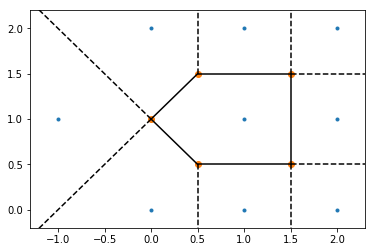

In [6]:
import numpy as np
points = np.array([[0, 0], [-1, 1], [0, 2], [1, 0], [1, 1], [1, 2],
                   [2, 0], [2, 1], [2, 2]])
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(points)
import matplotlib.pyplot as plt
voronoi_plot_2d(vor)
plt.show()

<class 'shapely.geometry.polygon.Polygon'>


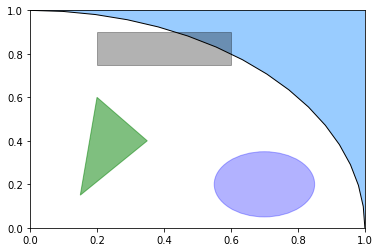

In [11]:
import matplotlib.pyplot as plt
from descartes import PolygonPatch
from shapely.geometry import Point

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
color='g', alpha=0.5)

donut = Point(0,0).buffer(5).symmetric_difference(Point(0,0).buffer(1))
# print type(donut)
 
ax.add_patch(PolygonPatch(donut, facecolor='#99ccff'))

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

plt.show()

0.0
3.41421356237


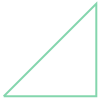

In [14]:
from shapely.geometry.polygon import LinearRing
ring = LinearRing([(0, 0), (1, 1), (1, 0)])
print ring.area
#0.0
print ring.length
#3.4142135623730949
LinearRing([(0, 0), (1, 1), (1, 0)])

In [11]:
lst = ['timestamp', 'exc_sl_calc_weight_rg', 'exc_sl_current_p11', 'exc_sl_current_p12', 'exc_sl_current_p21', 'exc_sl_current_p22', 'exc_sl_current_p23', 'exc_sl_current_p24', 'exc_sl_current_p25', 'exc_sl_density_in', 'exc_sl_density_out', 'exc_sl_flow_bent_cent', 'exc_sl_flow_bent_noz', 'exc_sl_flow_flush_ecb', 'exc_sl_flow_flush_sw', 'exc_sl_flow_flush_wcb', 'exc_sl_flow_in', 'exc_sl_flow_out', 'exc_sl_level_ana', 'exc_sl_open_pos_v073', 'exc_sl_pressure_in_p11', 'exc_sl_pressure_in_p12', 'exc_sl_pressure_in_p21', 'exc_sl_pressure_in_p22', 'exc_sl_pressure_in_p23', 'exc_sl_pressure_in_p24', 'exc_sl_pressure_in_p25', 'exc_sl_pressure_out_p11', 'exc_sl_pressure_out_p12', 'exc_sl_pressure_out_p21', 'exc_sl_pressure_out_p22', 'exc_sl_pressure_out_p23', 'exc_sl_pressure_out_p24', 'exc_sl_pressure_out_p25', 'exc_sl_press_in', 'exc_sl_speed_p11', 'exc_sl_speed_p12', 'exc_sl_speed_p21', 'exc_sl_speed_p22', 'exc_sl_speed_p23', 'exc_sl_speed_p24', 'exc_sl_speed_p25', 'exc_sl_bento_recirc_on', 'exc_sl_bypass_mode', 'exc_sl_close_v001', 'exc_sl_close_v002', 'exc_sl_close_v003', 'exc_sl_close_v004', 'exc_sl_close_v005', 'exc_sl_close_v008', 'exc_sl_close_v012', 'exc_sl_close_v013', 'exc_sl_close_v014', 'exc_sl_close_v017', 'exc_sl_close_v018', 'exc_sl_close_v019', 'exc_sl_close_v025', 'exc_sl_close_v026', 'exc_sl_close_v030', 'exc_sl_close_v031', 'exc_sl_close_v032', 'exc_sl_close_v033', 'exc_sl_close_v037', 'exc_sl_close_v038', 'exc_sl_close_v044', 'exc_sl_close_v050', 'exc_sl_close_v051', 'exc_sl_close_v053', 'exc_sl_close_v054', 'exc_sl_close_v055', 'exc_sl_close_v072', 'exc_sl_close_v074', 'exc_sl_close_v075', 'exc_sl_close_v076', 'exc_sl_close_v102', 'exc_sl_close_v107', 'exc_sl_close_v123', 'exc_sl_close_v60', 'exc_sl_close_v61', 'exc_sl_close_v63', 'exc_sl_close_v64', 'exc_sl_close_v80', 'exc_sl_close_v81', 'exc_sl_close_v82', 'exc_sl_close_v83', 'exc_sl_excav_mode', 'exc_sl_extention_mode', 'exc_sl_e_stop', 'exc_sl_installed_p12', 'exc_sl_installed_p22', 'exc_sl_installed_p23', 'exc_sl_installed_p24', 'exc_sl_installed_p25', 'exc_sl_level_p1', 'exc_sl_level_p10', 'exc_sl_level_p11', 'exc_sl_level_p12', 'exc_sl_level_p13', 'exc_sl_level_p14', 'exc_sl_level_p16', 'exc_sl_level_p3', 'exc_sl_level_p5', 'exc_sl_level_p7', 'exc_sl_level_p9', 'exc_sl_open_v001', 'exc_sl_open_v002', 'exc_sl_open_v003', 'exc_sl_open_v004', 'exc_sl_open_v005', 'exc_sl_open_v008', 'exc_sl_open_v009', 'exc_sl_open_v010', 'exc_sl_open_v013', 'exc_sl_open_v014', 'exc_sl_open_v017', 'exc_sl_open_v018', 'exc_sl_open_v019', 'exc_sl_open_v025', 'exc_sl_open_v026', 'exc_sl_open_v030', 'exc_sl_open_v031', 'exc_sl_open_v032', 'exc_sl_open_v033', 'exc_sl_open_v037', 'exc_sl_open_v038', 'exc_sl_open_v051', 'exc_sl_open_v053', 'exc_sl_open_v054', 'exc_sl_open_v055', 'exc_sl_open_v072', 'exc_sl_p01_default', 'exc_sl_p01_on', 'exc_sl_p02_default', 'exc_sl_p02_on', 'exc_sl_p11_default', 'exc_sl_p11_on', 'exc_sl_p12_default', 'exc_sl_p12_on', 'exc_sl_p21_default', 'exc_sl_p21_on', 'exc_sl_p22_default', 'exc_sl_p22_on', 'exc_sl_p23_default', 'exc_sl_p23_on', 'exc_sl_p24_default', 'exc_sl_p24_on', 'exc_sl_p25_default', 'exc_sl_p25_on', 'exc_sl_page_fault', 'exc_sl_panic', 'exc_sl_pp_fault', 'exc_sl_snake_man_valve_ls_close', 'exc_sl_stop_seal_p24', 'exc_sl_stop_seal_p25', 'exc_sl_teles_flush_pump_fault', 'exc_sl_we_mode']
['exc_sl_close_v001', 'exc_sl_close_v002', 'exc_sl_close_v003', 'exc_sl_close_v004', 'exc_sl_close_v005', 'exc_sl_close_v008', 'exc_sl_close_v009', 'exc_sl_close_v010', 'exc_sl_close_v011', 'exc_sl_close_v012', 'exc_sl_close_v013', 'exc_sl_close_v014', 'exc_sl_close_v017', 'exc_sl_close_v018', 'exc_sl_close_v019', 'exc_sl_close_v025', 'exc_sl_close_v026', 'exc_sl_close_v030', 'exc_sl_close_v031', 'exc_sl_close_v032', 'exc_sl_close_v033', 'exc_sl_close_v037', 'exc_sl_close_v038', 'exc_sl_close_v044', 'exc_sl_close_v050', 'exc_sl_close_v051', 'exc_sl_close_v053', 'exc_sl_close_v054', 'exc_sl_close_v055', 'exc_sl_close_v072', 'exc_sl_close_v074', 'exc_sl_close_v075', 'exc_sl_close_v076', 'exc_sl_close_v102', 'exc_sl_close_v107', 'exc_sl_close_v123', 'exc_sl_close_v60', 'exc_sl_close_v61', 'exc_sl_close_v63', 'exc_sl_close_v64', 'exc_sl_close_v80', 'exc_sl_close_v81', 'exc_sl_close_v82', 'exc_sl_close_v83', 'exc_sl_open_v001', 'exc_sl_open_v002', 'exc_sl_open_v003', 'exc_sl_open_v004', 'exc_sl_open_v005', 'exc_sl_open_v008', 'exc_sl_open_v009', 'exc_sl_open_v010', 'exc_sl_open_v011', 'exc_sl_open_v012', 'exc_sl_open_v013', 'exc_sl_open_v014', 'exc_sl_open_v017', 'exc_sl_open_v018', 'exc_sl_open_v019', 'exc_sl_open_v025', 'exc_sl_open_v026', 'exc_sl_open_v030', 'exc_sl_open_v031', 'exc_sl_open_v032', 'exc_sl_open_v033', 'exc_sl_open_v037', 'exc_sl_open_v038', 'exc_sl_open_v044', 'exc_sl_open_v050', 'exc_sl_open_v051', 'exc_sl_open_v053', 'exc_sl_open_v054', 'exc_sl_open_v055', 'exc_sl_open_v072']

POLYGON ((0 0, 0 5, 5 5, 5 0, 0 0))
('area', 25.0)


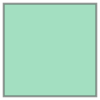

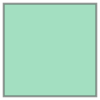

In [5]:
from shapely.geometry import Polygon
poly = Polygon([(0, 0), (0, 5), (5, 5), (5, 0)])
print(poly)
print("area", poly.area)
display(poly)

In [6]:
sum([2,2,3])

7

In [1]:
import struct
struct.unpack('!f', '42153d71'.decode('hex'))[0]

37.310001373291016

In [8]:
import pandas as pd
data = pd.read_csv("../Slurry_vol/data_2019-07-01 10_37_45 AM.csv")
data

,dr_px_ring_no,v001,v002,v003,v004,v005,v008,v009,v010,v011,...,v074,v075,v076,v80,v81,v82,v83,v102,v107,v123
0,700,5905,5906,5910,5910,5914,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,701,5739,5733,5743,5741,5751,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,702,5617,5617,5618,5618,5624,0,0,0,143,...,0,0,0,0,0,0,0,0,0,0
3,703,6931,6890,10399,10392,10742,2129,0,0,4939,...,0,0,0,0,0,0,0,0,0,0
4,704,5501,5520,5503,5486,5509,304,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,705,5391,5436,5393,5391,5395,344,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,706,5508,5767,5514,5510,5516,0,0,0,189,...,0,0,0,0,0,0,0,0,0,0
7,707,5500,5434,5498,5506,5892,0,0,0,5513,...,0,0,0,0,0,0,0,0,0,0
8,708,5319,5311,5323,5322,5331,0,0,0,5335,...,0,0,0,0,0,0,0,0,0,0
9,709,5398,5394,5399,5399,5404,0,0,0,5404,...,0,0,0,0,0,0,0,0,0,0


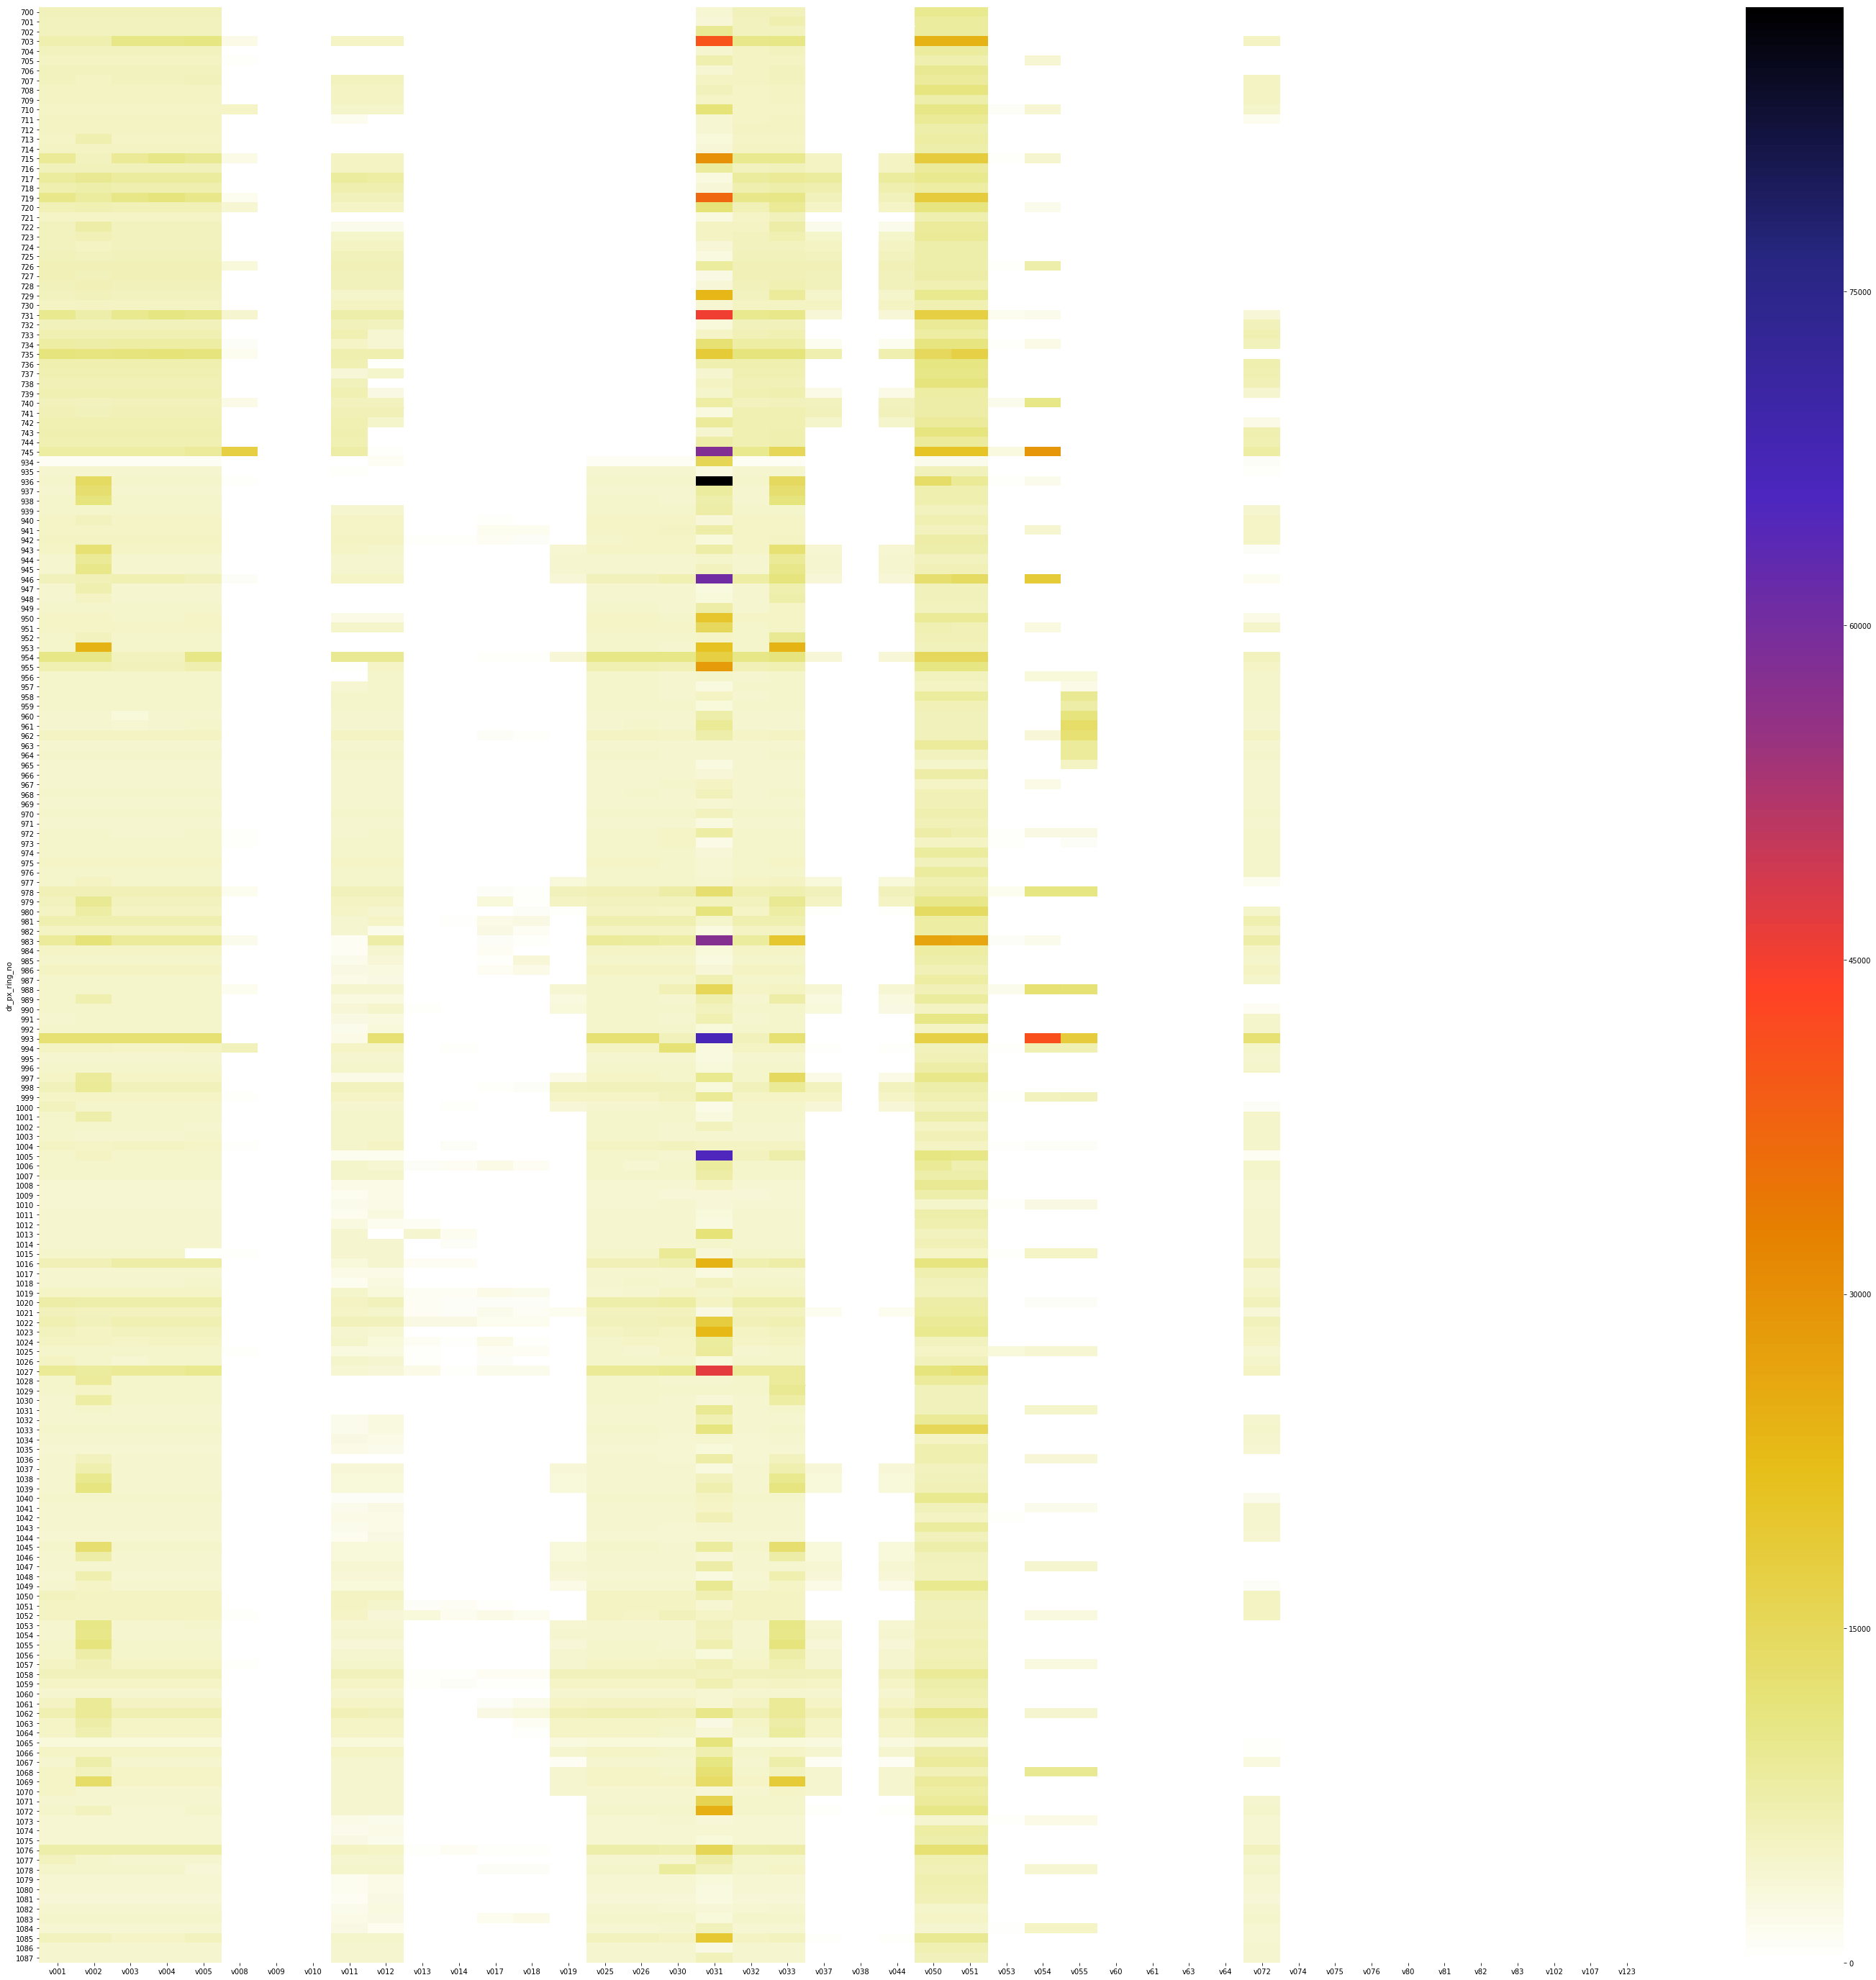

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
f, ax = plt.subplots(figsize=(50, 50))
sns.heatmap(data.set_index("dr_px_ring_no").fillna(0).iloc[:200,:], cmap="CMRmap_r",  ax=ax)
plt.yticks(rotation=0)
plt.show()

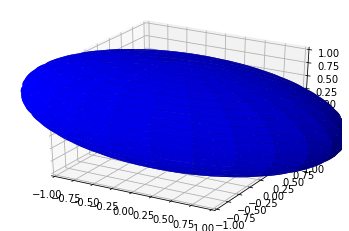

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy import pi,sin,cos

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
# ax.set_aspect('equal','box')
ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)
# ax.view_init(90,90)

# ellipseSteps= 100
# diamCoef = 200
# widthCoef = 100
# coefs = (widthCoef, diamCoef, diamCoef)  # Coefficients in a0/c x**2 + a1/c y**2 + a2/c z**2 = 1 
# # Radii corresponding to the coefficients:
# rx, ry, rz = 1/np.sqrt(coefs)
rx, ry, rz = 2, 1, 1

# Set of all spherical angles:
u = np.linspace(0, 2 * pi, ellipseSteps)
v = np.linspace(0, pi, ellipseSteps)

# Cartesian coordinates that correspond to the spherical angles:
# (this is the equation of an ellipsoid):
ex = rx * np.outer(cos(u), sin(v))
ey = ry * np.outer(sin(u), sin(v))
ez = rz * np.outer(np.ones_like(u), cos(v))

# Plot:
ax.plot_surface(ex, ey, ez,  rstride=4, cstride=4, color='blue')

plt.show()

In [78]:
import numpy as np
from scipy.linalg import expm

def rot_euler(v, xyz):
    """Rotate vector v (or array of vectors) by the euler angles xyz"""
    # https://stackoverflow.com/questions/6802577/python-rotation-of-3d-vector
    for theta, axis in zip(xyz, np.eye(3)):
        v = np.dot(np.array(v), expm(np.cross(np.eye(3), axis*-theta)))
    return v

Same result: True
OP:        1.2055687199990643 ms
optimized: 0.22081220099971688 ms


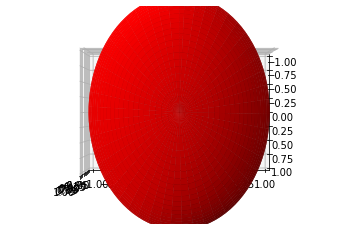

In [124]:
from scipy.linalg import block_diag
from timeit import timeit

def rot_euler_better(v, xyz):
    TD = np.multiply.outer(np.exp(1j * np.asanyarray(xyz)), [[1], [1j]]).view(float)
    x, y, z = (block_diag(1, TD[i])[np.ix_(*2*(np.arange(-i, 3-i),))] for i in range(3))
    return v @ (x @ y @ z)

# example
# xyz = np.pi * np.array((1/6, -2/3, 3/4))
xyz = np.pi * np.array((1, 1, 1/4))

print("Same result:",
      np.allclose(rot_euler(np.array((*map(np.ravel, (ex, ey, ez)),)).T, xyz),
                  rot_euler_better(np.array((*map(np.ravel, (ex, ey, ez)),)).T, xyz)))

print("OP:       ", timeit(lambda: rot_euler(np.array((*map(np.ravel, (ex, ey, ez)),)).T, xyz), number=1000), "ms")
print("optimized:", timeit(lambda: rot_euler_better(np.array((*map(np.ravel, (ex, ey, ez)),)).T, xyz), number=1000), "ms")

ex, ey, ez = map(np.reshape, rot_euler_better(np.array((*map(np.ravel, (ex, ey, ez)),)).T, xyz).T, map(np.shape, (ex, ey, ez)))

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
# ax.set_aspect('equal','box')
ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)
ax.view_init(90,0)
ax.plot_surface(ex, ey, ez,  rstride=2, cstride=2, color='red')

plt.show()

In [1]:
import numpy as np
from random import seed, randint, gauss

seed(1)
random_lst = [randint(0, 100) for _ in range(100)]
seed(1)
random_lst = [int(gauss(0, 100)) for _ in range(100)]

np.median(random_lst)
np.median(np.abs(random_lst - np.median(random_lst)))

56.5

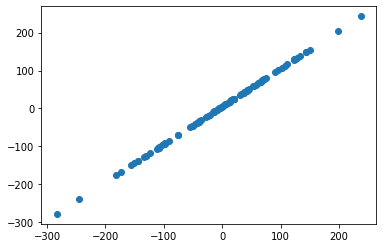

In [4]:
import matplotlib.pyplot as plt

plt.scatter(random_lst - np.median(random_lst), random_lst - np.mean(random_lst))
plt.show()

3


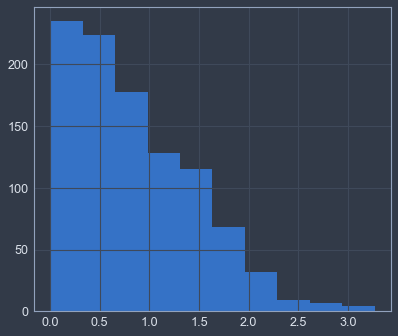

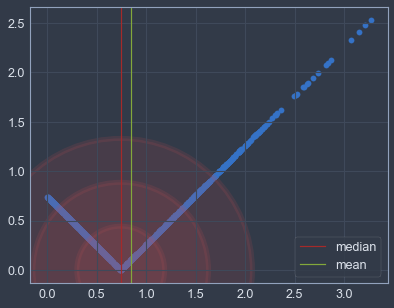

In [489]:
import matplotlib.pyplot as plt
from random import seed, randint, gauss
import numpy as np

def rand_int(mini, maxi, nb):
    return [randint(mini, maxi) for _ in range(nb)]
def rand_gauss(mu, sigma, nb):
    return [gauss(mu, sigma) for _ in range(nb)]


def rand_int_lst(iteration):#, distrib):
    random_lst = []
    for group in range(iteration):
#         seed(group)
        mini, maxi = rand_int(*sorted([randint(0, 100), randint(0, 100)]), 2)
        mu = randint(0, randint(0, 100))
        sigma = gauss(0, randint(0, 20))
#         seed(group)
        nb = randint(0, randint(0, 10000))
        random_lst.extend(rand_gauss(mu, sigma, nb))
#         random_lst.extend(rand_int(*sorted([randint(0, 100), randint(0, 100)]), randint(0, 10000)))
    return random_lst

nb_distrib = randint(1, 4)
print(nb_distrib)
random_lst = rand_int_lst(nb_distrib)

# random_lst = r

# print(random_lst)

plt.hist(random_lst)

fig, ax = plt.subplots()
ax.set_aspect('equal')
plt.scatter(random_lst, np.abs(random_lst - np.median(random_lst)))
# plt.scatter(random_lst, random_lst - np.median(random_lst))
for mad in range(3, 0, -1):
    ax.add_artist(plt.Circle((np.median(random_lst), 0),
                             mad * np.median(np.abs(random_lst - np.median(random_lst))),
                             color='r', lw=5,  alpha=0.15))
plt.axvline(x=np.median(random_lst), color='brown', label="median")
plt.axvline(x=np.mean(random_lst), color='g', label="mean")

plt.legend()
plt.show()

Histogrammes avec les différentes méthodes offertes par numpy pour le calcul du nombre de classes


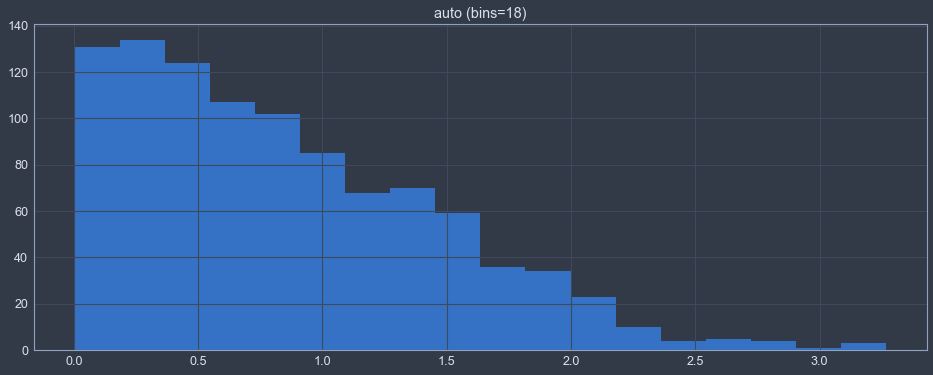

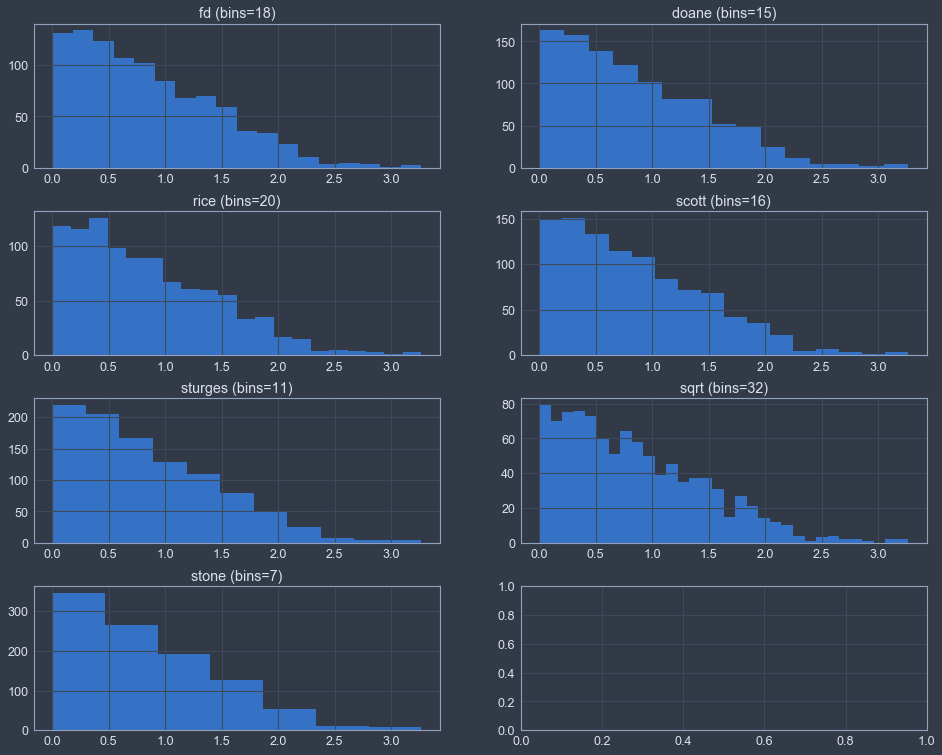

In [490]:
def histo_bins(data, modes=['fd', 'doane', 'rice', 'scott', 'sturges', 'sqrt', 'stone']):
    
    print("Histogrammes avec les différentes méthodes offertes par numpy pour le calcul du nombre de classes")

    plt.figure(figsize=(16, 6))
    plt.title("auto (bins="+str(len(np.histogram(data, bins='auto')[0]))+")")
    plt.hist(data, bins='auto')
    
    nrows = int(round(len(modes) / 2))
    fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(16, 13))
    for row in range(nrows):
        for col in range(2):
            if row * 2 + (col + 1) <= len(modes):
                axes[row, col].set_title(modes[row * 2 + col]+" (bins="+str(len(np.histogram(data, bins=modes[row * 2 + col])[0]))+")")
                axes[row, col].hist(data, bins=modes[row * 2 + col])
    plt.subplots_adjust(hspace=0.3)

histo_bins(random_lst)

In [32]:
# from unidip import UniDip
# import unidip.dip as dip

# data = np.msort(random_lst)
# print(dip.diptst(data))
# intervals = UniDip(data).run()
# print(intervals)

(0.009365685520807118, 0.000999000999000999, (7861, 10566))
[(230, 3289), (3291, 5560), (6332, 7857), (7861, 10565)]


In [491]:
precis = bins = 18

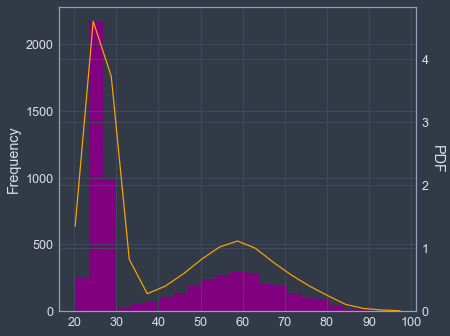

In [225]:
from scipy.stats import gaussian_kde
from numpy import linspace

ax = plt.gca()
plt.hist(random_lst, bins='auto', color="purple", label="histogram auto")
plt.ylabel('Frequency')
ax2 = ax.twinx()
rand_min, rand_max = min(random_lst), max(random_lst)
density_func = gaussian_kde(random_lst)
step = linspace(rand_min, rand_max, precis)
plt.plot(step, density_func(step) * (rand_max - rand_min),
         color = "orange",
         label="probability density function")
plt.ylabel('PDF', rotation=270, labelpad=15)
ax2.set_ylim(ymin=0)
# ax.legend()
# ax2.legend()

# for tuples in intervals:
#     rand_min, rand_max = data[tuples[0]], data[tuples[1]]
#     data_local = data[tuples[0]:tuples[1]]
#     density_func = gaussian_kde(data_local)
#     step = linspace(rand_min, rand_max, precis)
#     plt.plot(step, density_func(step) * (rand_max - rand_min),
#              color = "orange",
#              label="probability density function")
# plt.show()


def plotHistogramAndPdf(data, x, pdf):
    ax = plt.gca()
    plt.hist(data, bins = 4, alpha = 0.4, label = 'histogram of input values');
    plt.ylabel('Frequency')
    plt.xlabel('x values')
    ax2 = ax.twinx()
    plt.plot(x, pdf, c = 'red', label = 'probability density function');
    plt.ylabel('PDF')
    [tl.set_color('r') for tl in ax2.get_yticklabels()]
    ax.legend(bbox_to_anchor=(0.4, 1.15))
    ax2.legend(bbox_to_anchor=(1.15,1.15))
#     plt.savefig('figures/hist.jpg', bbox_inches='tight')

def prob_density_func(data, kernel="gaussian_kde", precis=500):
    # Initialisation du kernel : loi de probabilité à appliquer aux données
    density_func = eval("{kernel}(data)".format(kernel=kernel))
    # Densité de point à faire évaluer par le kernel
    step = linspace(min(data), max(data), precis)
    # Visualisation
    plt.plot(step, density_func(step) * (max(data) - min(data)))
    plt.show()

# prob_density_func(random_lst)

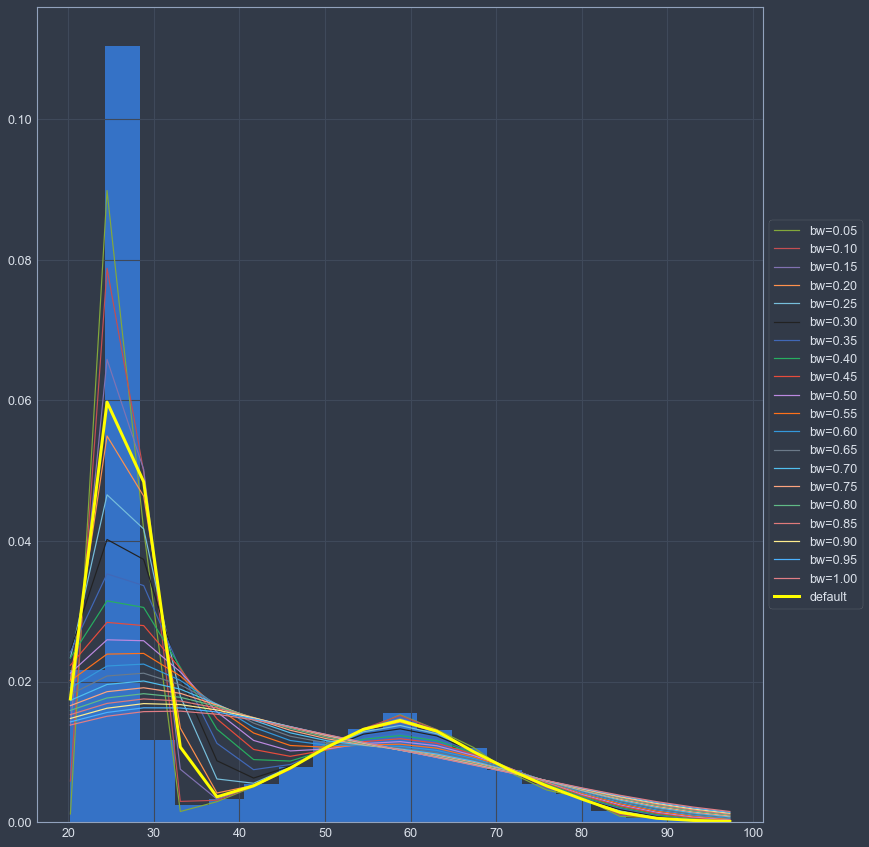

In [226]:
fig, ax = plt.subplots(figsize=(13, 15))

ax.hist(random_lst, bins, histtype='stepfilled', density=True)
# ax2 = ax.twinx()

for bandwidth in np.arange(0.05, 1.05, 0.05):
    density_func = gaussian_kde(random_lst, bw_method=bandwidth)
    rand_min, rand_max = min(random_lst), max(random_lst)
    step = linspace(rand_min, rand_max, precis)
    ax.plot(step, density_func(step),
             label='bw={0:.2f}'.format(bandwidth))
density_func = gaussian_kde(random_lst)
ax.plot(step, density_func(step), lw=3, color="yellow", label="default")
ax.legend(loc='center left', bbox_to_anchor=(1., 0.5))
plt.show()

{'bandwidth': 0.5590810182512224}


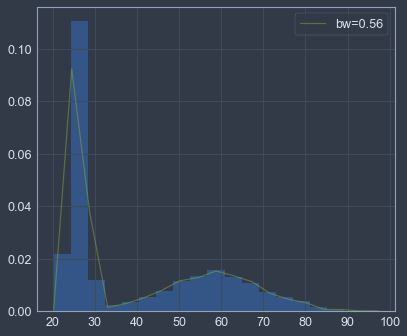

In [227]:

## Normalisation des données
# for bins in range(10, 100, 10):
#     density, bins, patches = plt.hist(random_lst, bins=bins, alpha=0.5, density=True)
#     plt.show()
#     widths = bins[1:] - bins[:-1]
#     print((density * widths).sum())

density, bins, patches = plt.hist(random_lst, bins=bins, alpha=0.5, density=True)

from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV, LeaveOneOut
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
#                     {'bandwidth': np.linspace(0.05, 1.0, 20)},
                    {'bandwidth': 10 ** np.linspace(-1, 1, 100)},
                    cv=20)#LeaveOneOut())# 20-fold cross-validation
x = np.asarray(random_lst)
grid.fit(x[:, None])
print(grid.best_params_)
best_bw = grid.best_params_['bandwidth']

# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=best_bw, kernel='gaussian')
kde.fit(x[:, None])

# score_samples returns the log of the probability density
x_d = np.asarray(step)
logprob = kde.score_samples(x_d[:, None])

plt.plot(x_d, np.exp(logprob), alpha=0.5, label=f'bw={best_bw:.2f}')
plt.legend()

plt.show()


2
(24.52263436979682, 0.09238185805521158)
(58.76763776869648, 0.015324483482212041)


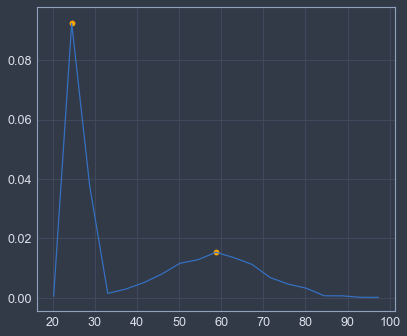

In [244]:
plt.plot(x_d, np.exp(grid.best_estimator_.score_samples(x_d[:, None])))

from scipy.signal import find_peaks
peaks, _ = find_peaks(np.exp(grid.best_estimator_.score_samples(x_d[:, None])), distance=5)

print(len(peaks))
for local_max in zip(np.take(x_d, peaks),
                     np.take(np.exp(grid.best_estimator_.score_samples(x_d[:, None])), peaks)):
    print(local_max)

plt.scatter(np.take(x_d, peaks),
            np.take(np.exp(grid.best_estimator_.score_samples(x_d[:, None])), peaks),
            color="orange")

plt.show()

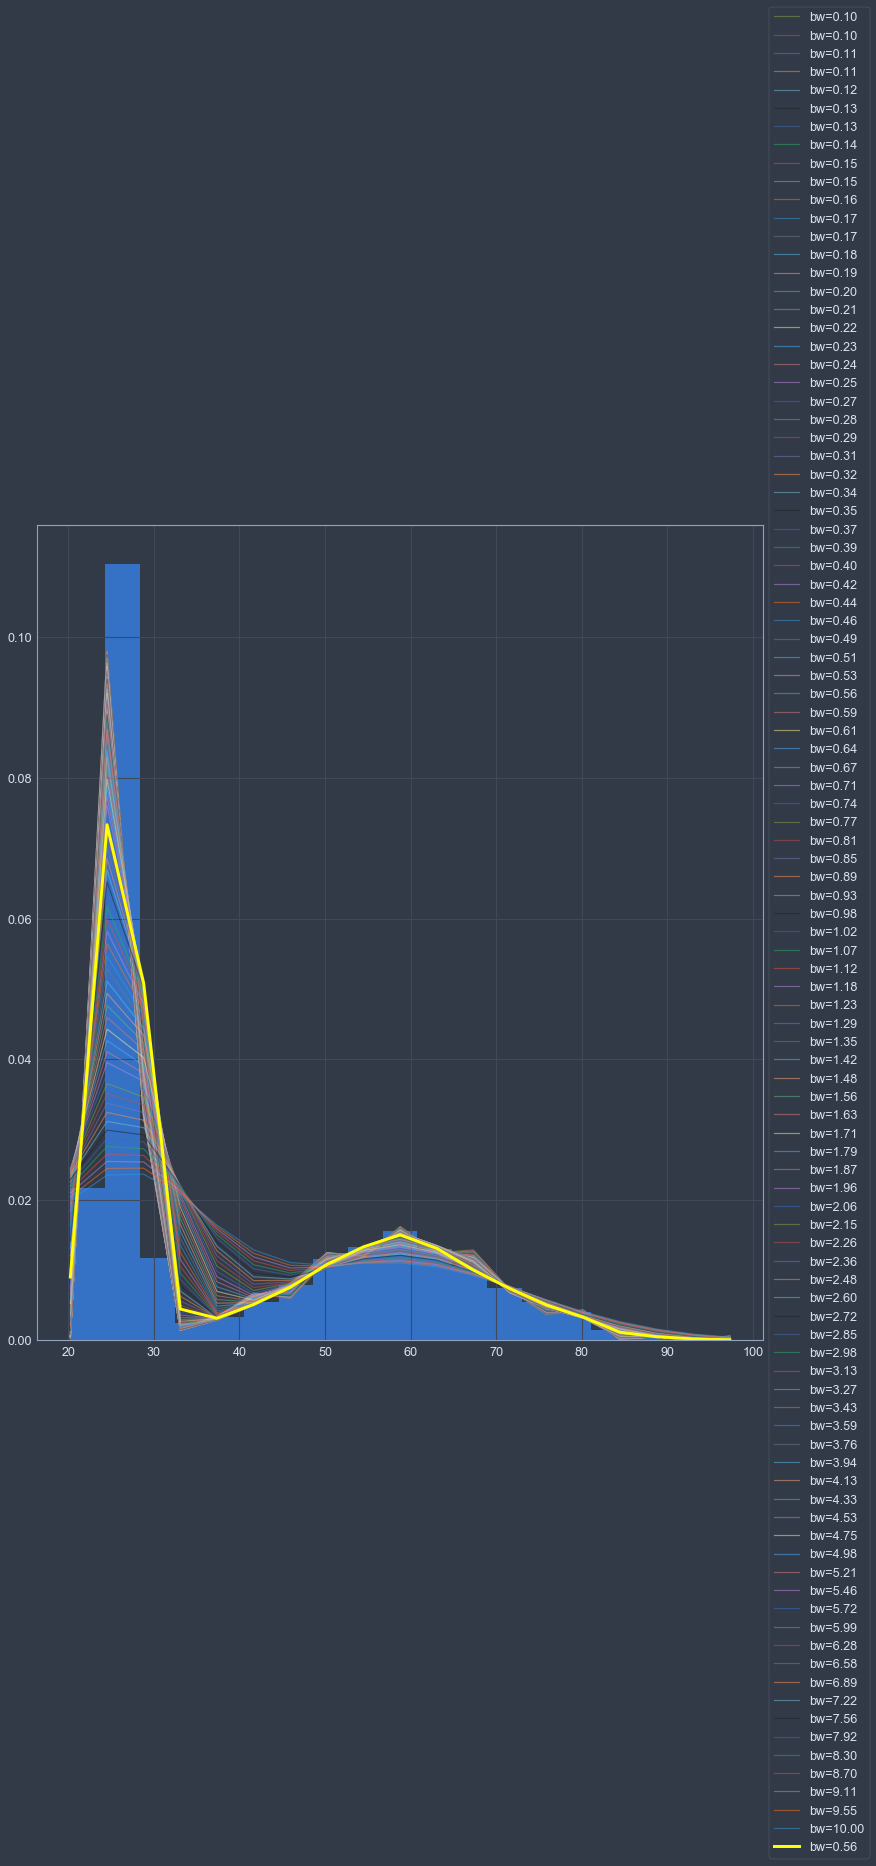

In [229]:
fig, ax = plt.subplots(figsize=(13, 15))

ax.hist(random_lst, bins, histtype='stepfilled', density=True)
# ax2 = ax.twinx()

x = np.asarray(random_lst)

for bandwidth in list(10 ** np.linspace(-1, 1, 100)):
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
    kde.fit(x[:, None])
    x_d = np.asarray(step)
    logprob = kde.score_samples(x_d[:, None])
    ax.plot(x_d, np.exp(logprob), alpha=0.5, label=f'bw={bandwidth:.2f}')

kde = KernelDensity(bandwidth=best, kernel='gaussian')
kde.fit(x[:, None])
plt.plot(x_d, np.exp(kde.score_samples(x_d[:, None])), lw=3, color="yellow", label=f'bw={best_bw:.2f}')
    
ax.legend(loc='center left', bbox_to_anchor=(1., 0.5))
plt.show()

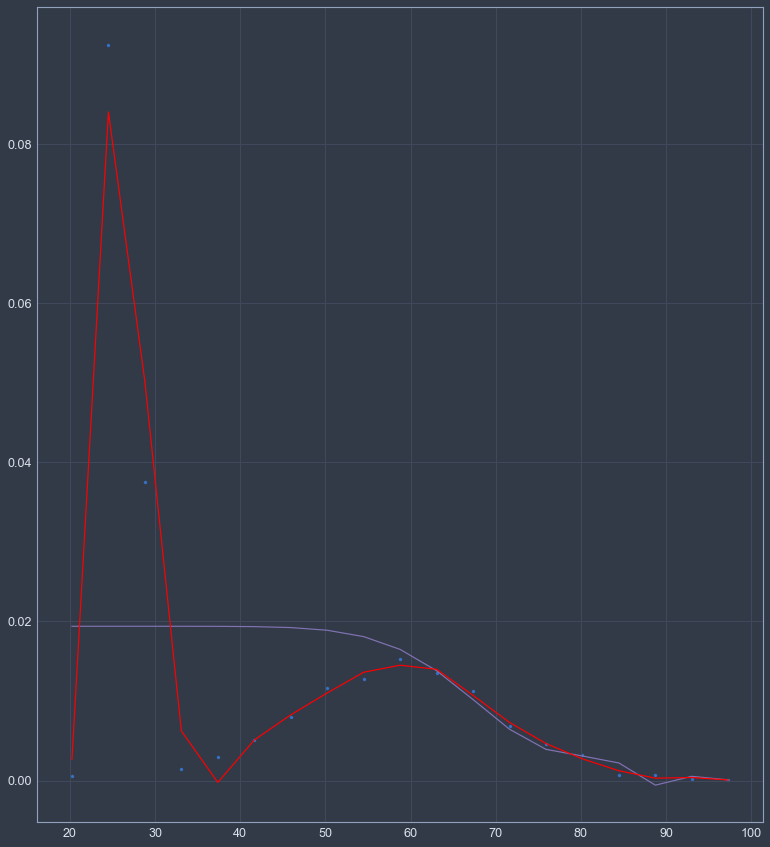

rmse_best_degree = 0.01922623048641892 21
r2_best_degree = 0.14518615118677636 21


In [234]:
from sklearn.preprocessing import PolynomialFeatures
import scipy
from sklearn.metrics import mean_squared_error, r2_score
import operator

fig, ax = plt.subplots(figsize=(13, 15))

rmse_best = 1000
rmse_best_degree = 0
r2_best = 0
r2_best_degree = 0

for degree in range(21, 22):
    polynomial_features= PolynomialFeatures(degree=degree)
    x = x_d[:, None]
    x_poly = polynomial_features.fit_transform(x)

    model = LinearRegression()
    y = np.exp(grid.best_estimator_.score_samples(x_d[:, None]))
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)

    rmse = np.sqrt(mean_squared_error(y, y_poly_pred))
    r2 = r2_score(y, y_poly_pred)
    if rmse < rmse_best:
        rmse_best = rmse
        rmse_best_degree = degree
    if r2 > r2_best:
        r2_best = r2
        r2_best_degree = degree
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
    x, y_poly_pred = zip(*sorted_zip)
    ax.plot(x, y_poly_pred, color='m')

    plt.plot(x, scipy.signal.savgol_filter(y, 5, 3), color='red')
    

plt.scatter(x, y, s=10, label=f"degree = {degree}")
plt.show()

print("rmse_best_degree =", rmse_best, rmse_best_degree)
print("r2_best_degree =", r2_best, r2_best_degree)

In [ ]:
# Lissage par moyenne mobile
# Check sur les abscisses qui demeurent
# Gaussian mixture
# Test sur la médiane centrée (il faut déjà avoir coupé les data)

4


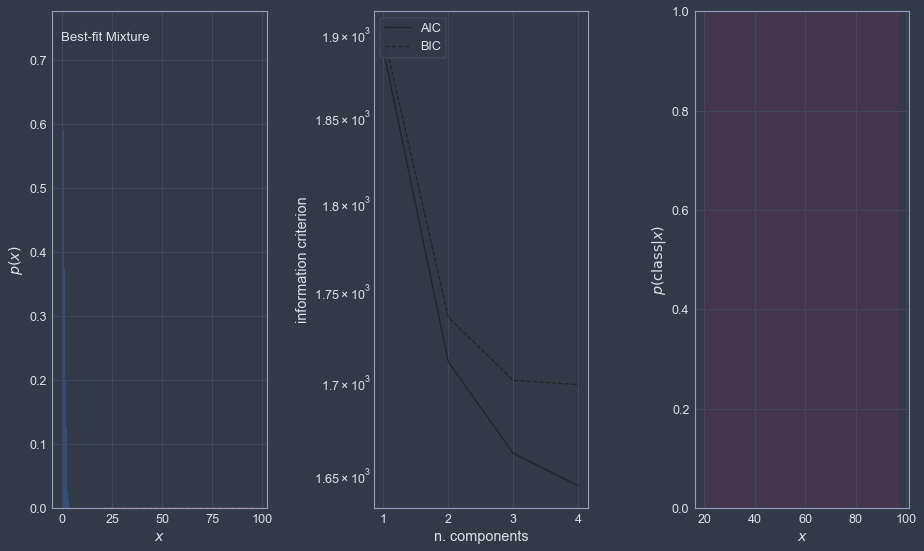

In [498]:
## https://www.astroml.org/book_figures/chapter4/fig_GMM_1D.html

from sklearn.mixture import GaussianMixture, BayesianGaussianMixture

X = np.asarray(random_lst).reshape(-1, 1)

#------------------------------------------------------------
# Learn the best-fit GaussianMixture models
#  Here we'll use scikit-learn's GaussianMixture model. The fit() method
#  uses an Expectation-Maximization approach to find the best
#  mixture of Gaussians for the data

# fit models with 1-10 components
N = np.arange(1, 5)
models = [None for i in range(len(N))]

for i in range(len(N)):
    models[i] = GaussianMixture(N[i]).fit(X)

# compute the AIC and the BIC
AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]

#------------------------------------------------------------
# Plot the results
#  We'll use three panels:
#   1) data + best-fit mixture
#   2) AIC and BIC vs number of components
#   3) probability that a point came from each component

fig = plt.figure(figsize=(14, 10))
fig.subplots_adjust(left=0.12, right=0.97,
                    bottom=0.21, top=0.9, wspace=0.5)


# plot 1: data + best-fit mixture
ax = fig.add_subplot(131)
M_best = models[np.argmin(AIC)]

print(M_best.n_components)
# print("means", M_best.means_)
# print("weights", M_best.weights_)
# print("covariances", M_best.covariances_)

x = step
logprob = M_best.score_samples(x.reshape(-1, 1))
responsibilities = M_best.predict_proba(x.reshape(-1, 1))
pdf = np.exp(logprob)
pdf_individual = responsibilities * pdf[:, np.newaxis]

ax.hist(X, bins, density=True, histtype='stepfilled', alpha=0.4)
ax.plot(x, pdf, '-k')
ax.plot(x, pdf_individual, '--r')
ax.text(0.04, 0.96, "Best-fit Mixture",
        ha='left', va='top', transform=ax.transAxes)
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')


# plot 2: AIC and BIC
ax = fig.add_subplot(132)
ax.plot(N, AIC, '-k', label='AIC')
ax.plot(N, BIC, '--k', label='BIC')
ax.set_xlabel('n. components')
ax.set_ylabel('information criterion')
ax.set_yscale('log')
ax.legend(loc=2)


# plot 3: posterior probabilities for each component
ax = fig.add_subplot(133)

p = responsibilities
# p = p[:, (1, 0, 2)]  # rearrange order so the plot looks better
p = p.cumsum(1).T

p_list = [0, 1]
if responsibilities.shape[1] > 1:
    for nb_p in range(responsibilities.shape[1] - 1):
        p_list.insert(len(p_list) - 1, p[nb_p])
for p_fill in [(p1, p2) for p1, p2 in zip(p_list[:-1], p_list[1:])]:
#     print(p_fill)
    ax.fill_between(x, p_fill[0], p_fill[1], color=random_color(), alpha=0.1)
        
# ax.fill_between(x, 0, p[0], color='gray', alpha=0.3)
# ax.fill_between(x, p[0], p[1], color='gray', alpha=0.5)
# ax.fill_between(x, p[1], 1, color='gray', alpha=0.7)

ax.set_ylim(0, 1)
ax.set_xlabel('$x$')
ax.set_ylabel(r'$p({\rm class}|x)$')

# ax.text(-5, 0.3, 'class 1', rotation='vertical')
# ax.text(0, 0.5, 'class 2', rotation='vertical')
# ax.text(3, 0.3, 'class 3', rotation='vertical')

plt.show()


5


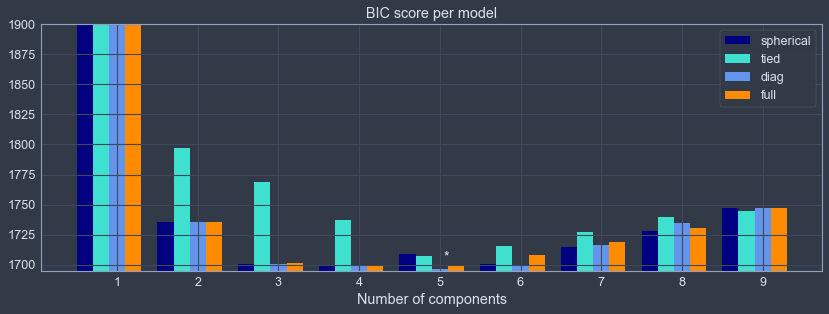

0 [0.93372804] [0.03837152]
1 [1.52015462] [0.07543389]
2 [0.17401243] [0.01171838]
3 [2.08659105] [0.24958294]
4 [0.49650673] [0.02372575]


In [500]:
import itertools
from scipy import linalg
import matplotlib as mpl

from sklearn import mixture

X = np.asarray(random_lst).reshape(-1, 1)

lowest_bic = np.infty
bic = []
n_components_range = range(1, 10)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
print(clf.n_components)
bars = []

# Plot the BIC scores
plt.figure(figsize=(14, 10))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

plt.show()

for i, (mean, cov) in enumerate(zip(clf.means_, clf.covariances_)):
    print(i, mean, cov)


In [494]:
best_gmm

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

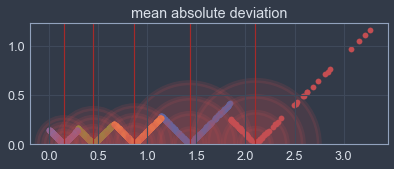

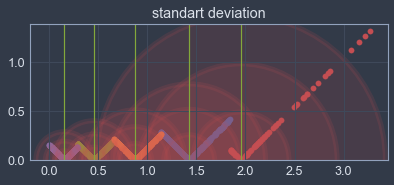

3 1.0
2 1.0
1 0.7747747747747747
3 1.0
2 1.0
1 0.7710843373493976
3 1.0
2 0.948051948051948
1 0.7922077922077922
3 1.0
2 1.0
1 0.6714285714285714
3 1.0
2 1.0
1 0.7975206611570248


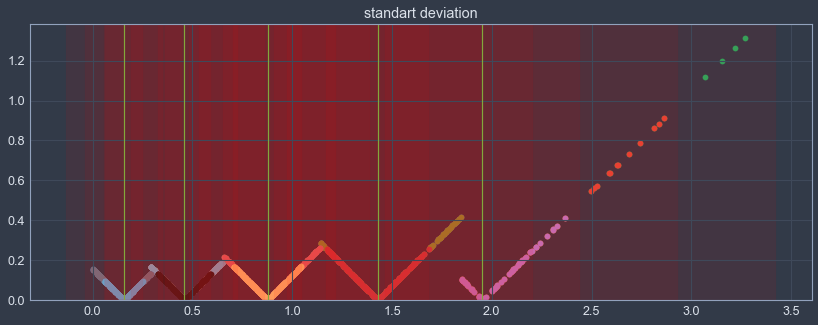

In [495]:
X_classified = clf.predict(X)

fig, ax = plt.subplots()
ax.set_aspect('equal')
for distrib in range(clf.n_components):
    random_lst_classified = X[X_classified == distrib]
    ax.scatter(random_lst_classified,
               np.abs(random_lst_classified - np.median(random_lst_classified)))
    for mad in range(4, 0, -1):
        ax.add_artist(plt.Circle((np.median(random_lst_classified), 0),
                                 mad * np.median(np.abs(random_lst_classified - np.median(random_lst_classified))),
                                 color='r', lw=5,  alpha=0.15))
    plt.axvline(x=np.median(random_lst_classified), color='brown', label="median")
#     plt.axvline(x=np.mean(random_lst_classified), color='g', label="mean")
ax.set_ylim(ymin=0)
plt.title("mean absolute deviation")
plt.show()



fig, ax = plt.subplots()
ax.set_aspect('equal')
for distrib, (mean, cov) in enumerate(zip(clf.means_, clf.covariances_)):
    random_lst_classified = X[X_classified == distrib]
    ax.scatter(random_lst_classified,
               np.abs(random_lst_classified - mean))
    for sigma in range(3, 0, -1):
        ax.add_artist(plt.Circle((mean, 0),
                                 sigma * np.sqrt(cov),
                                 color='r', lw=5,  alpha=0.15))
#     plt.axvline(x=np.median(random_lst_classified), color='brown', label="median")
    plt.axvline(x=mean, color='g', label="mean")
ax.set_ylim(ymin=0)
plt.title("standart deviation")
plt.show()

for distrib, (mean, cov) in enumerate(zip(clf.means_, clf.covariances_)):
    random_lst_classified = X[X_classified == distrib]
    nb_ech = random_lst_classified.shape[0]
    for sigma in range(3, 0, -1):
        print(sigma, random_lst_classified[np.abs(random_lst_classified - mean) <
                                           sigma * np.sqrt(cov)].shape[0] / nb_ech)


fig, ax = plt.subplots(figsize=(14, 10))
ax.set_aspect('equal')
for distrib, (mean, cov) in enumerate(zip(clf.means_, clf.covariances_)):
    random_lst_classified = X[X_classified == distrib]
    for sigma in range(3, 0, -1):
        ax.axvspan(mean - sigma * np.sqrt(cov), mean + sigma * np.sqrt(cov), alpha=0.08, color='red')
    for sigma in range(3, 0, -1):
        random_lst_classified_sigma = random_lst_classified[np.abs(random_lst_classified - mean) <
                                                            sigma * np.sqrt(cov)]
        ax.scatter(random_lst_classified_sigma,
                   np.abs(random_lst_classified_sigma - mean))
    random_lst_classified_sigma = random_lst_classified[np.abs(random_lst_classified - mean) >=
                                                            3 * np.sqrt(cov)]
    ax.scatter(random_lst_classified_sigma, np.abs(random_lst_classified_sigma - mean))
    plt.axvline(x=mean, color='g', label="mean")
ax.set_ylim(ymin=0)
plt.title("standart deviation")
plt.show()




In [397]:
clf.means_[0]
np.sqrt(clf.covariances_[1])*3*2
#20-32


58.69538000750636

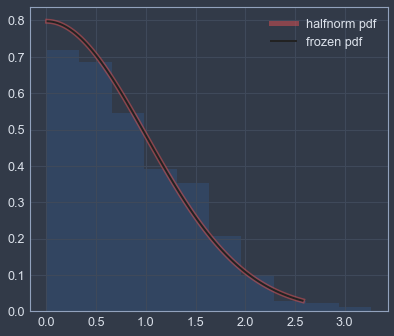

In [485]:
from scipy.stats import halfnorm

fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = halfnorm.stats(moments='mvsk')
x = np.linspace(halfnorm.ppf(0.01),
               halfnorm.ppf(0.99), 100)
ax.plot(x, halfnorm.pdf(x),
          'r-', lw=5, alpha=0.6, label='halfnorm pdf')

rv = halfnorm()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
vals = halfnorm.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], halfnorm.cdf(vals))
r = halfnorm.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

{'covariance_type': 'diag', 'max_iter': 1000, 'n_components': 7}


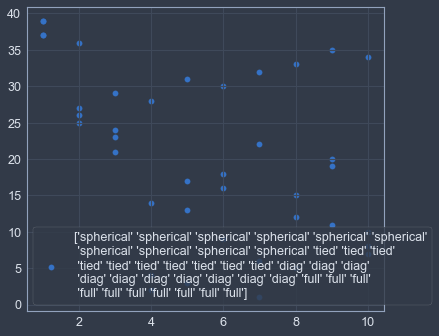

In [536]:
from sklearn.mixture import BayesianGaussianMixture
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
tuned_parameters = {'n_components': np.arange(1, 11), 'max_iter': [1000],
                    'covariance_type': ['spherical', 'tied', 'diag', 'full']}
#construct grid search object that uses 3 fold cross validation
clf = GridSearchCV(BayesianGaussianMixture(), tuned_parameters, cv=3)
#fit the data
clf.fit(r.reshape(-1, 1))
print(clf.best_params_)

ax.scatter(clf.cv_results_['param_n_components'],
            clf.cv_results_['rank_test_score'], label=clf.cv_results_['param_covariance_type'])

plt.show()